# **WELCOME TO EXCALIBUR FLIGHT SIM**
Please refrain from editing any constants unless told explicitly by Kush, or edit and make the original code a comment.

#Importing Files, Modules and Libraries

In [ ]:
!curl -o thrust_curve https://raw.githubusercontent.com/KushMahajan/IREC25/refs/heads/main/thrust_curve.csv?token=GHSAT0AAAAAAC3ENMAAQFP3PHMBFAIFFWVAZ2MH4VA
!curl -o power_off_drag https://raw.githubusercontent.com/KushMahajan/IREC25/refs/heads/main/power_off_drag.csv?token=GHSAT0AAAAAAC6RK5EXYEDYXPSJIISNGW76Z5FUEHQ
!curl -o power_on_drag https://raw.githubusercontent.com/KushMahajan/IREC25/refs/heads/main/power_on_drag.csv?token=GHSAT0AAAAAAC6RK5EXF6NU6T6QNKEOQSKKZ5FUGXA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     75      0 --:--:-- --:--:-- --:--:--    75
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     86      0 --:--:-- --:--:-- --:--:--    86
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     59      0 --:--:-- --:--:-- --:--:--    59


In [ ]:
!pip install --up

!pip install rocketpy --pre netCDF4

import os
import sys


!rm -r IREC25
!git clone -b main https://{token}@github.com/KushMahajan/IREC25.git


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --up (--upgrade, --upgrade-strategy?)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.7/356.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.5 MB/s eta 0:00:00
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65910 sha256=4597

In [ ]:
!pip install timezonefinder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.6 MB/s eta 0:00:00


In [ ]:
import os

IREC25_directory = '/content/IREC25'
os.chdir(IREC25_directory)

print(os.getcwd())
print(os.listdir())

/content/IREC25
['Lift coefficient.csv', 'power_on_drag.csv', 'thrust_curve.csv', 'disp_inputs.txt.txt', 'IREC25 Simulation and Analysis', 'IREC25', '.git', 'power_off_drag.csv', 'CL.csv', 'README.md', 'disp_errors.txt', 'AeroTech_M1939W (1).eng', 'disp_outputs.txt.txt', 'M1939.eng']


In [ ]:
# Add the path to the rocketpy library in IREC25 repo to sys.path
import sys
sys.path.append('/content/IREC25')

# Import the necessary libraries
from rocketpy import Environment, Rocket, Flight, Function

# Import the SolidMotor class from the correct directory
from rocketpy.motors import SolidMotor

In [ ]:
import os
import numpy as np
import scipy
from scipy.optimize import minimize
import tkinter as tk
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.matplotlib_fname())
import pandas as pd
import math
import datetime

/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
# Configure plotting for inline use
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

#Enviroment Declaration

/usr/local/lib/python3.11/dist-packages/rocketpy/environment/tools.py:309: UserWarning: Exact chosen launch time is not available in the provided file, using 2025-03-17 18:00:00 UTC instead.
  warnings.warn(


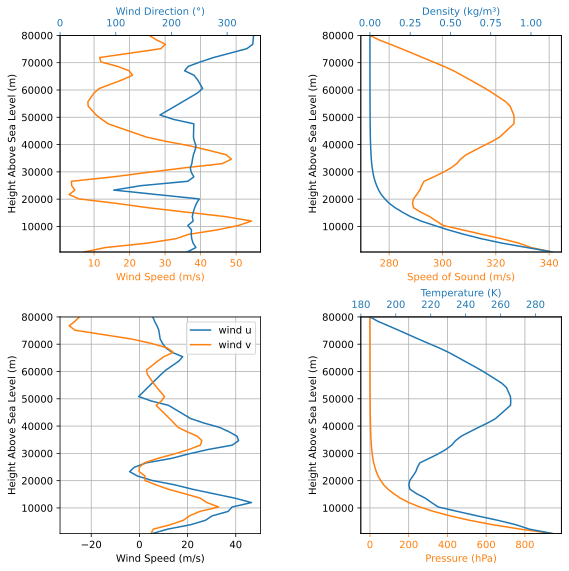

'\ntomorrow = datetime.date.today() + datetime.timedelta(days=1)\n\nenv.set_date(\n  (tomorrow.year, tomorrow.month, tomorrow.day, 12), timezone="America/Phoenix"\n) # Tomorrow\'s date in year, month, day, hour UTC format #for far \'America/Los_Angeles\'\n\nenv.set_atmospheric_model(type=\'Forecast\', file=\'GFS\')'

In [ ]:
tomorrow = datetime.datetime.now()
#+ datetime.timedelta(hours = 10)
env = Environment(
    #date=now_plus_twelve,
    #latitude=31.039168, MIDLAND TEXAS
    #longitude=-103.536997,
    #elevation = 894.2832
    latitude=35.34722,   #FAR
    longitude=-117.8099547,
    elevation = 626.67
)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 17)
)
#env.set_atmospheric_model(type="Ensemble", file="GEFS")
env.set_atmospheric_model(type='Forecast', file='GFS')
env._max_expected_height = 4500
env.plots.atmospheric_model()
"""
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
  (tomorrow.year, tomorrow.month, tomorrow.day, 12), timezone="America/Phoenix"
) # Tomorrow's date in year, month, day, hour UTC format #for far 'America/Los_Angeles'

env.set_atmospheric_model(type='Forecast', file='GFS')"""

##Set custom wind speed
#env.set_atmospheric_model(
 #   type="custom_atmosphere",
  #  pressure=None,
   #temperature=300,
   #wind_u=[(0, 5), (1000, 10)],
    #wind_v=[(0, -2), (500, 3), (1600, 2)],
#)
#env.wind_speed()
#print(pytz.all_timezones)


Gravity Details

Acceleration of gravity at surface level:    9.7948 m/s²
Acceleration of gravity at   4.500 km (ASL): 9.7838 m/s²


Launch Site Details

Launch Date: 2025-03-17 17:00:00 UTC
Launch Site Latitude: 35.34722°
Launch Site Longitude: -117.80995°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 426403.05 W    3911850.51 N
Launch Site UTM zone: 11S
Launch Site Surface Elevation: 906.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 4.500 km
Forecast Time Period: from 2025-03-17 12:00:00 to 2025-04-02 12:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 8.03 m/s
Surface Wind Direction: 229.22°
Surface Wind Heading: 49.22°
Surface Pressure: 910.56 hPa
Surface Temperature: 287.41 K
Surface Air Density: 1.104 kg/m³
Surface Speed of Sound: 339.86 m/s


Earth Model Details

Earth Radius at Launch si

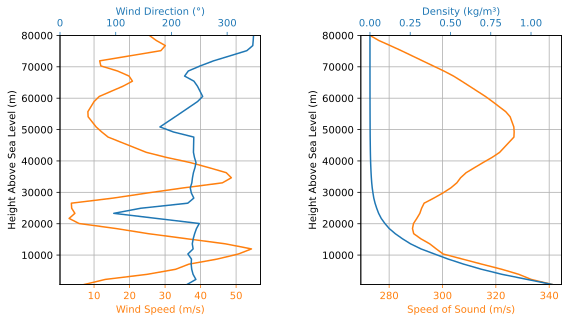

In [ ]:
env.info()

#Motor Initialization and Declaration

In [ ]:
M2500 = SolidMotor(
            thrust_source="/content/IREC25/thrust_curve.csv",
            #thrust_source = "C:\Kushpy\IREC SIM\IREC25\AeroTech_M1939W (1).eng",
            dry_mass = 3494/1000,  # From motor spec
    dry_inertia = [0.2518481455314, 0.0066512301875, 0.2518481455314],  # From CAD
    reshape_thrust_curve=[4.24, 9671.0],
    grain_number = 4,
    grain_separation = 2.54/1600,  # From motor spec
    grain_density = 1560,  # Estimated
    grain_outer_radius = 3.37 * 2.54/(2 * 100),  # From motor spec
    grain_initial_inner_radius=(3.506216/(2*100)),  # From CAD
    grain_initial_height= 0.1524 - (2.54/3200),  # From motor spec
    grains_center_of_mass_position=0.752 - 0.37224932 + 0.02,  # From CAD
    center_of_dry_mass_position=0.752 - 0.35871749,  # From CAD
    nozzle_radius= 1.5*2.54/100,  #From motor spec
    throat_radius=2.54/200, #From motor spec
    #nozzle_position=0.7409,
    nozzle_position= 0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
    interpolation_method="spline",
    #average_thrust = 1939,
    #max_thrust = 2429.7,
    #total_impulse = 10481.5,
    burn_time=4.264,
    #propellant_initial_mass = 5.719
)

Nozzle Details
Nozzle Radius: 0.0381 m
Nozzle Throat Radius: 0.0127 m

Grain Details
Number of Grains: 4
Grain Spacing: 0.0015875 m
Grain Density: 1560 kg/m3
Grain Outer Radius: 0.042799000000000004 m
Grain Inner Radius: 0.01753108 m
Grain Height: 0.15160625 m
Grain Volume: 0.001 m3
Grain Mass: 1.133 kg

Motor Details
Total Burning Time: 4.24 s
Total Propellant Mass: 4.531 kg
Structural Mass Ratio: 0.435
Average Propellant Exhaust Velocity: 2134.600 m/s
Average Thrust: 2280.896 N
Maximum Thrust: 2883.4015731109243 N at 1.256850023507287 s after ignition.
Total Impulse: 9671.000 Ns



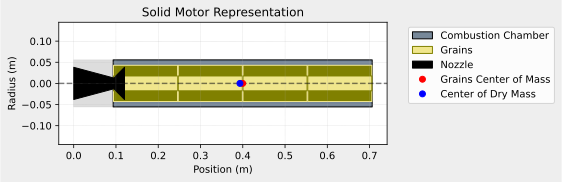

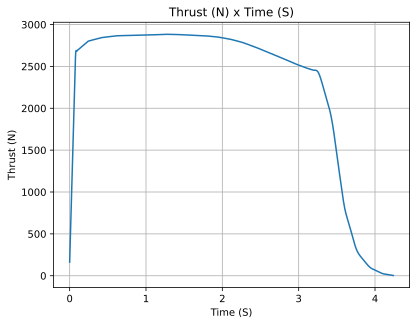

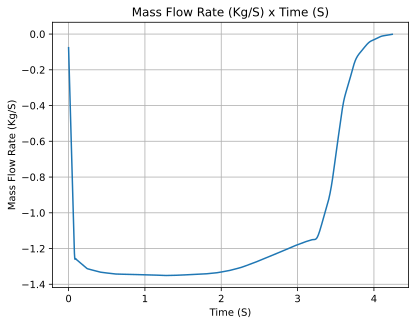

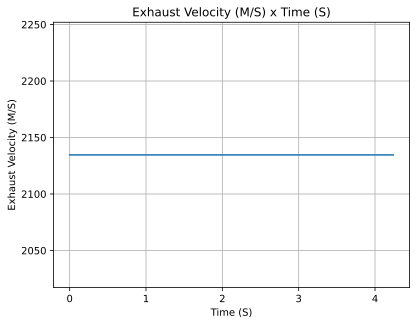

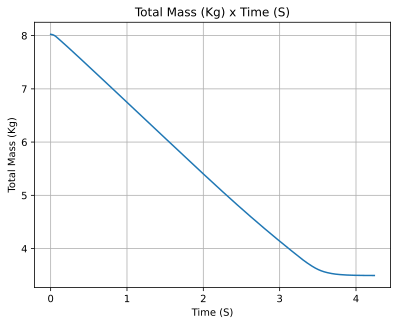

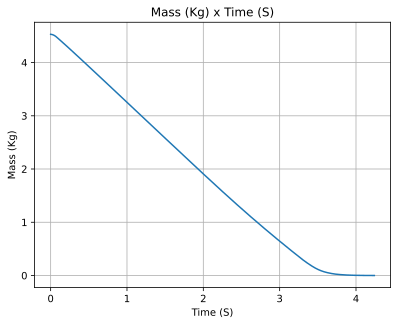

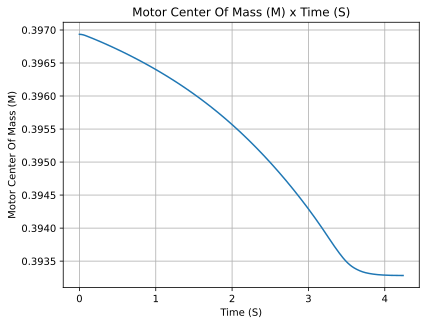

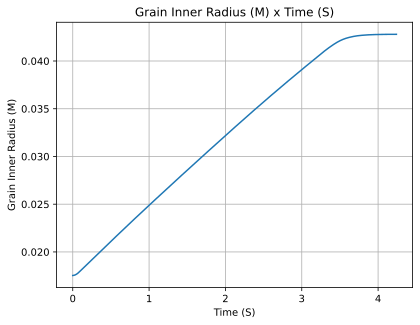

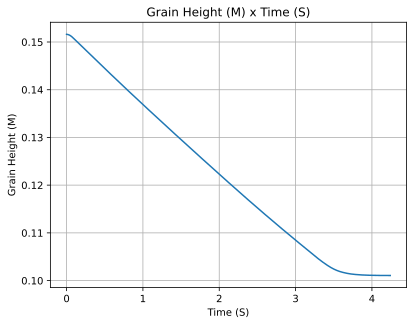

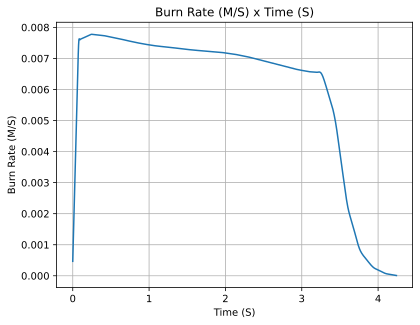

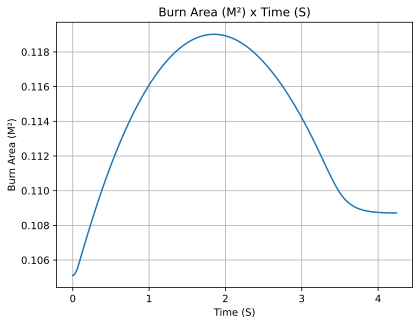

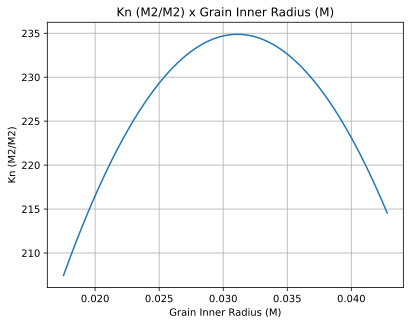

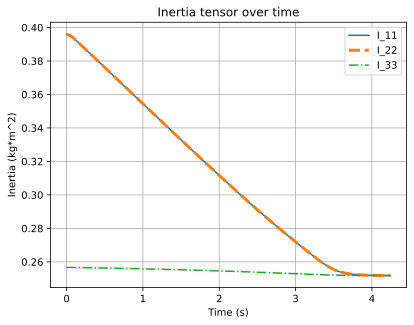

In [ ]:
M2500.all_info()

#Excalibur Rocket Initialization

In [ ]:
Excalibur = Rocket(
    radius = 6.17 * 2.54/200,
    mass = 20.638,
    inertia = [12.951768927, 12.951808145, 0.0868653164],
    power_off_drag = pd.read_csv("/content/IREC25/power_off_drag.csv", header = None).values,  # Pass the 2D array
    power_on_drag = pd.read_csv("/content/IREC25/power_on_drag.csv", header = None).values,
    center_of_mass_without_motor = 1.718,
    coordinate_system_orientation = "nose_to_tail",
)

In [ ]:
rail_buttons = Excalibur.set_rail_buttons(
    upper_button_position=1.94,
    lower_button_position=2.96,
    angular_position=135,
)

In [ ]:
Excalibur.add_motor(M2500, position = 2.4+0.702)

In [ ]:
nose_cone = Excalibur.add_nose(length=0.781, kind="vonKarman", position=0)


camera_set = Excalibur.add_trapezoidal_fins(
    n=3,
    root_chord=0.078,
    tip_chord=0.005,
    span=0.016,
    position=1.81,
    sweep_length = 0.051
    #sweep_angle = 57.5
    #cant_angle=0.5,
    #airfoil=("NACA0012-radians.csv", "radians"),
)

fin_set = Excalibur.add_trapezoidal_fins(
    n=3,
    root_chord=0.20,
    tip_chord=0.054,
    span=0.159,
    position=2.84,
    sweep_length = 0.19,
    #sweep_angle = 57.5
    #cant_angle=0.5,
    #airfoil = ("/content/IREC25/CL.csv", "degrees")
    #airfoil=("/content/IREC25/fin_polars.csv", "degrees"),
)

Identification of the AeroSurface:
----------------------------------
Name: Fins
Python Class: <class 'rocketpy.rocket.aero_surface.fins.trapezoidal_fins.TrapezoidalFins'>

Geometric information of the fin set:
-------------------------------------
Number of fins: 3
Reference rocket radius: 0.078 m
Tip chord: 0.054 m
Root chord: 0.200 m
Span: 0.159 m
Cant angle: 0.000 ° or 0.000 rad
Longitudinal section area: 0.020 m²
Aspect ratio: 2.504 
Gamma_c: 0.634 m
Mean aerodynamic chord: 0.064 m

Roll information of the fin set:
--------------------------------
Geometric constant: 0.000 m
Damping interference factor: 1.218 rad
Forcing interference factor: 0.935 rad

Lift information of the fin set:
--------------------------------
Lift interference factor: 1.330 m
Center of Pressure position in local coordinates: (0.000, 0.000, 0.112)
Lift Coefficient derivative (single fin) at Mach 0 and AoA 0: 2.891
Lift Coefficient derivative (fin set) at Mach 0 and AoA 0: 5.768


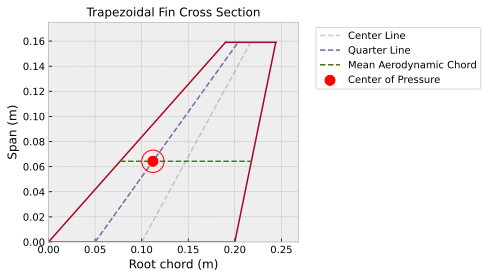

Roll parameters:


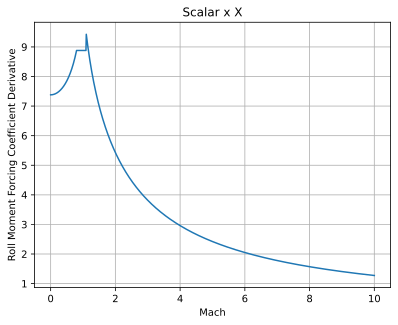

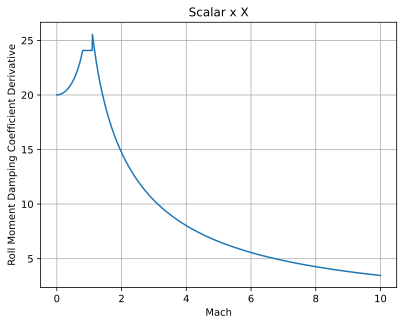

Lift coefficient:


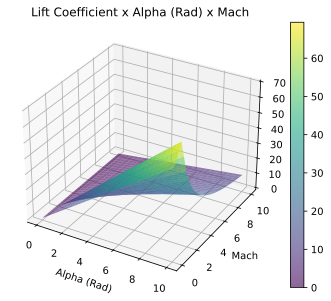

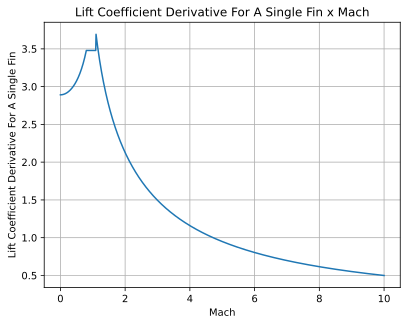

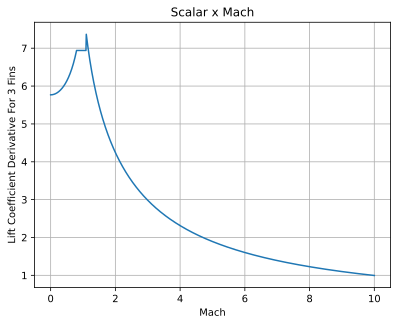

In [ ]:
fin_set.all_info()


Inertia Details

Rocket Mass: 20.638 kg (without motor)
Rocket Dry Mass: 24.132 kg (with unloaded motor)
Rocket Loaded Mass: 28.663 kg
Rocket Structural Mass Ratio: 0.842
Rocket Inertia (with unloaded motor) 11: 16.137 kg*m2
Rocket Inertia (with unloaded motor) 22: 15.891 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.339 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.078359 m
Rocket Frontal Area: 0.019290 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.143 m
Rocket Center of Dry Mass - Nozzle Exit: 1.241 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.841 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.133 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 0.108/rad
Fins Lift Coefficien

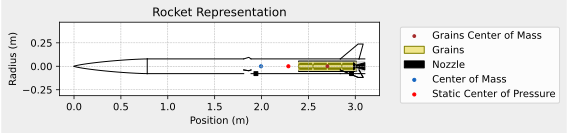


Mass Plots
----------------------------------------


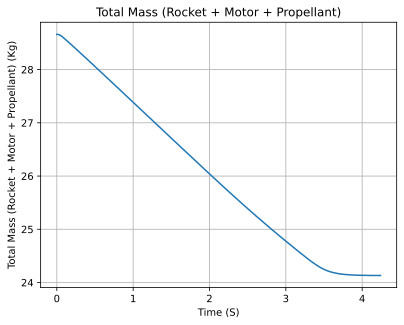

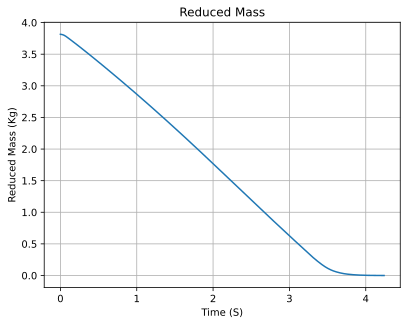


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


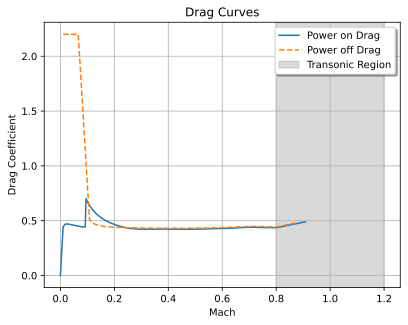


Stability Plots
--------------------


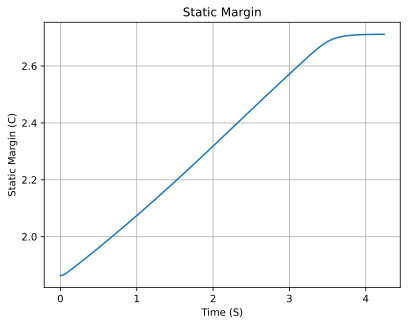

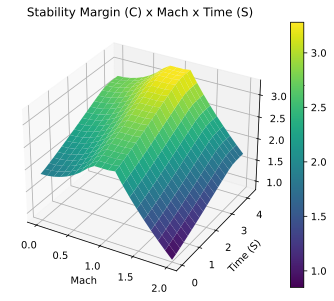


Thrust-to-Weight Plot
----------------------------------------


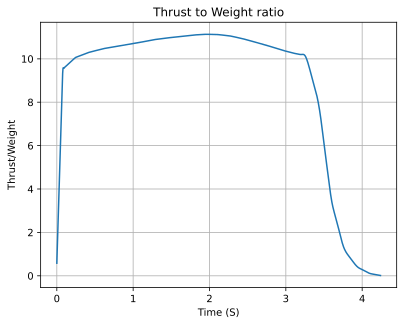

In [ ]:
Excalibur.all_info()

In [ ]:
main = Excalibur.add_parachute(
    name="main", #120''d
    cd_s= (np.pi * (2.13/2) ** 2) * 2.2,
    trigger=365.76,  # ejection altitude: 1100ft
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)


drogue = Excalibur.add_parachute(
    name="drogue", #60''d
    cd_s= (np.pi * (0.914/2) ** 2) *2.2,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

In [ ]:
#In case of extra fins
#Excalibur.aerodynamic_surfaces.pop(-1)

#Flight Computation for full Excalibur Vehicle

In [ ]:
test_flight = Flight(
  rocket=Excalibur, environment=env, rail_length=5.6, inclination=86, heading=0, max_time = 300)


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 906.52 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.382 | e1: -0.013 | e2: -0.032 | e3: -0.923
Euler Angles - Spin φ : -135.00° | Nutation θ: -4.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 1.864 c


Surface Wind Conditions

Frontal Surface Wind Speed: 5.23 m/s
Lateral Surface Wind Speed: -6.09 m/s


Launch Rail

Launch Rail Length: 5.6 m
Launch Rail Inclination: 86.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.361 s
Rail Departure Velocity: 27.961 m/s
Rail Departure Stability Margin: 1.936 c
Rail Departure Angle of Attack: 16.254°
Rail Departure Thrust-Weight Ratio: 10.220
Rail Departure Reynolds Number: 2.783e+05


Burn out State

Burn out time: 4.240 s
Altitude at burn out: 1668.334 m (ASL) | 761.812 m (AGL)
Rocket speed at burn out: 291.004 m/s
Freestream 

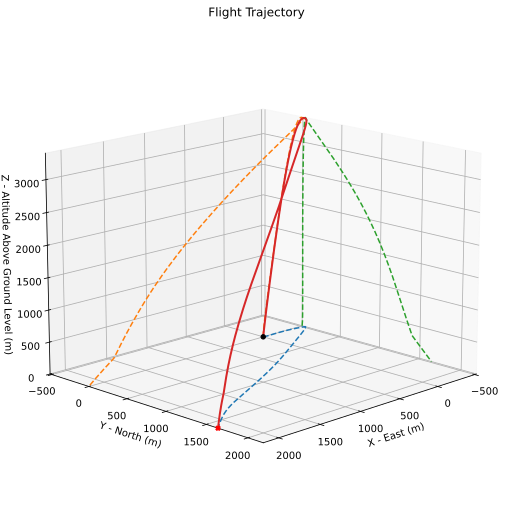



Trajectory Kinematic Plots



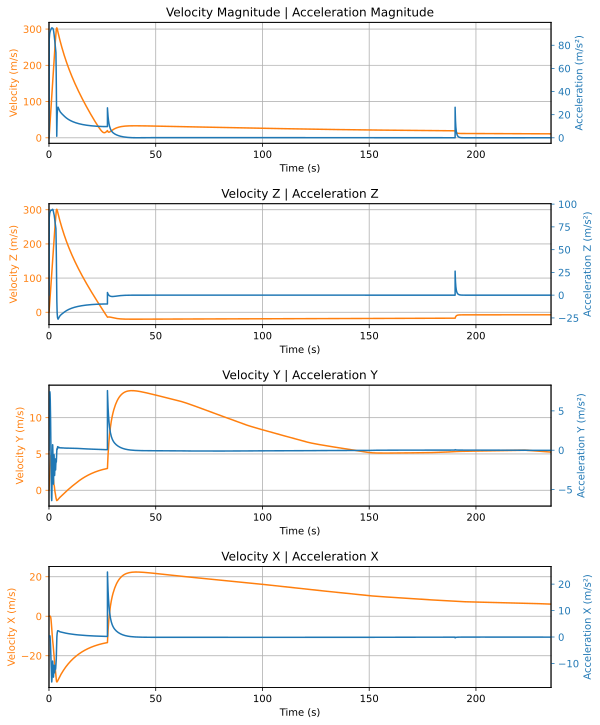



Angular Position Plots



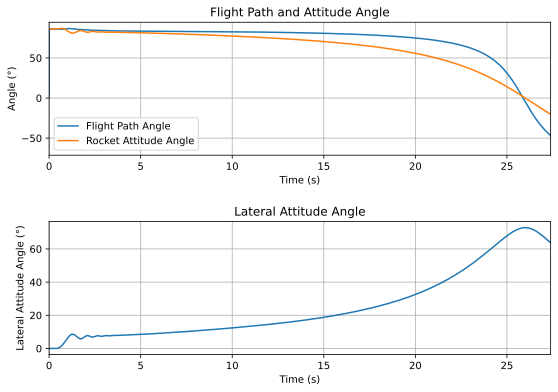



Path, Attitude and Lateral Attitude Angle plots



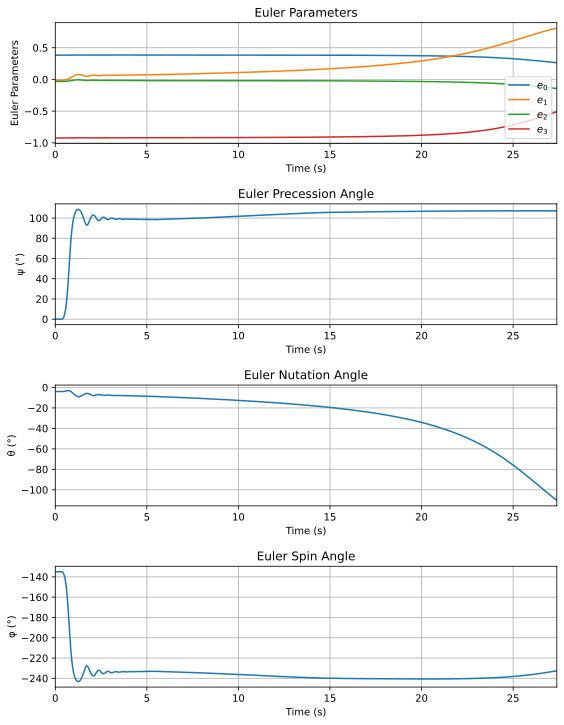



Trajectory Angular Velocity and Acceleration Plots



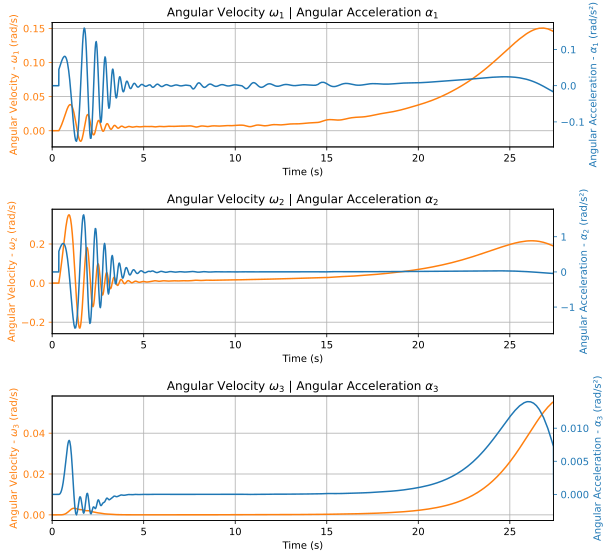



Aerodynamic Forces Plots



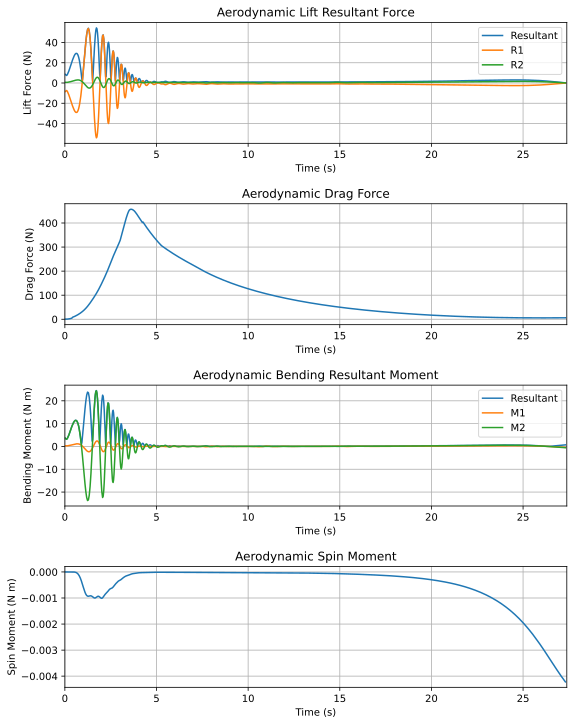



Rail Buttons Forces Plots



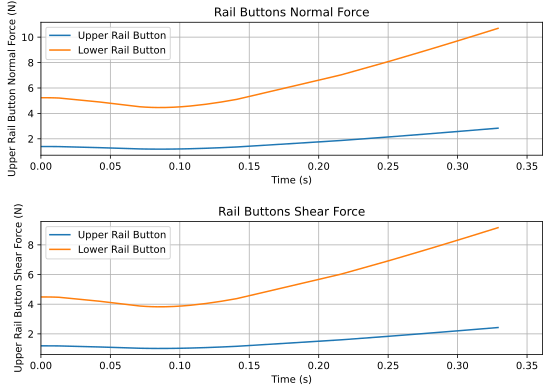



Trajectory Energy Plots



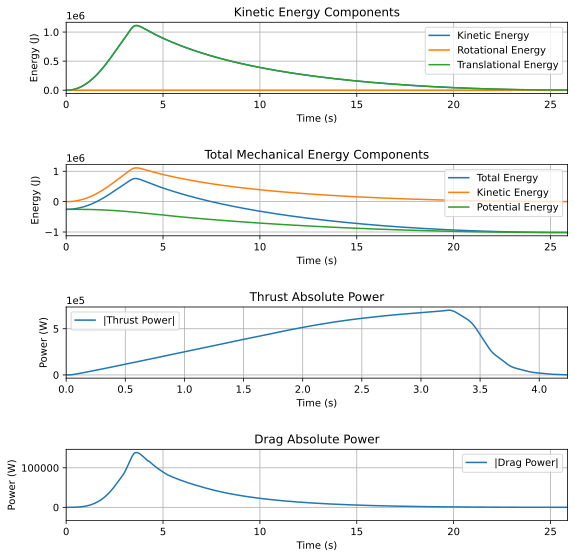



Trajectory Fluid Mechanics Plots



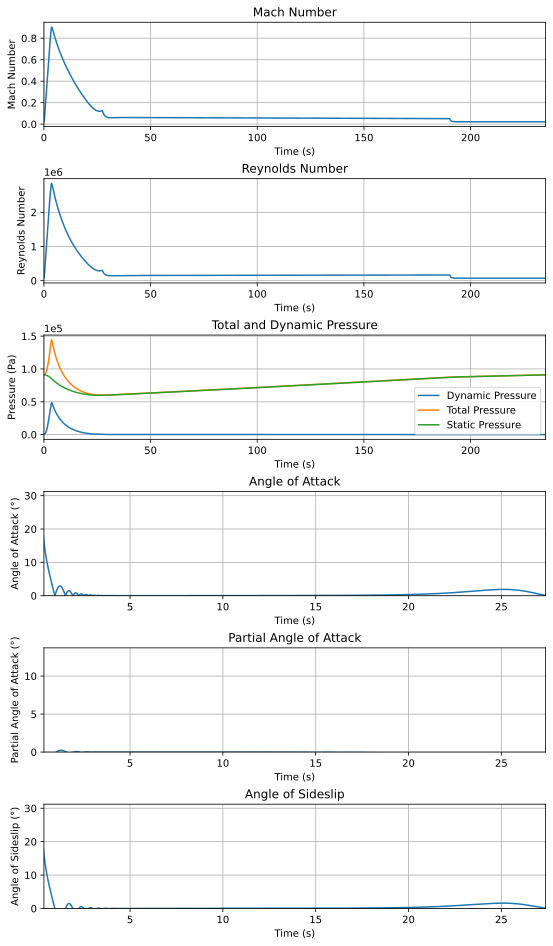



Trajectory Stability and Control Plots



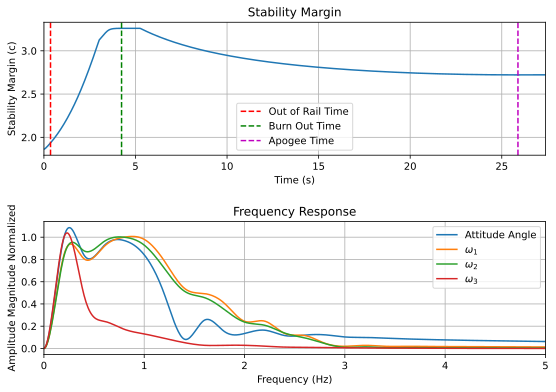



Rocket and Parachute Pressure Plots



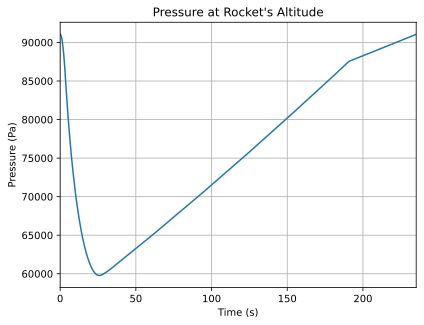


Parachute:  main


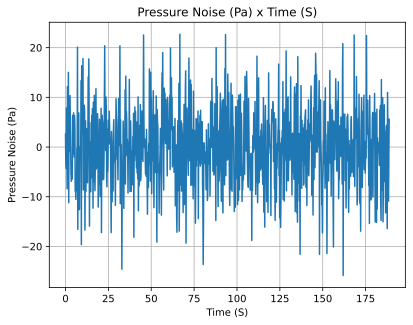

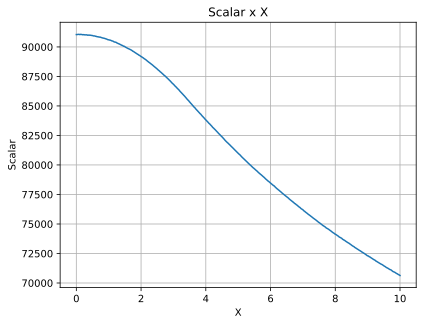

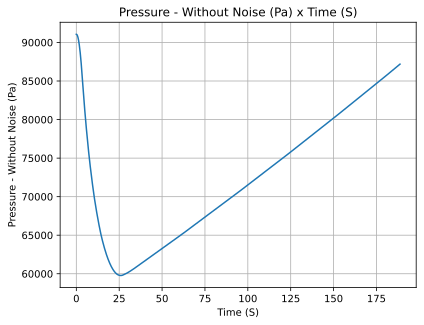


Parachute:  drogue


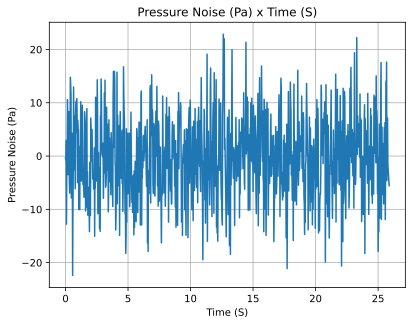

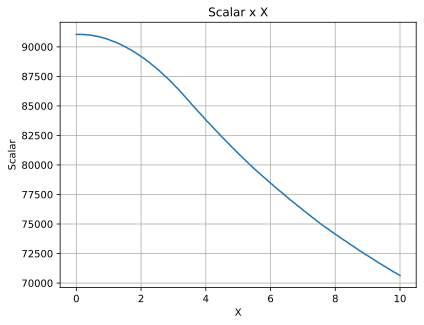

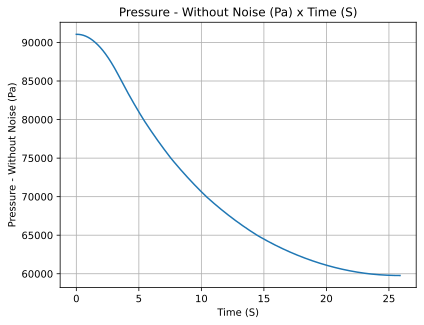

In [ ]:
test_flight.all_info()

In [ ]:
test_flight.export_kml(
    file_name="trajectory.kml",
    extrude=True,
    altitude_mode="relative_to_ground",
)

#Payload Flight Sims

##Excalibur No Payload Initialization

In [ ]:
Excalibur_no_payload = Rocket(
    radius = 6.17 * 2.54/200,
    mass = 22.14,
    inertia = [10.900115952, 10.900886587, 0.1010162512],
    power_off_drag = pd.read_csv("/content/IREC25/power_off_drag.csv", header = None).values,  # Pass the 2D array
    power_on_drag = pd.read_csv("/content/IREC25/power_on_drag.csv", header = None).values,
    center_of_mass_without_motor = 1.8115,
    coordinate_system_orientation = "nose_to_tail",
)

rail_buttons = Excalibur_no_payload.set_rail_buttons(
    upper_button_position=1.94,
    lower_button_position=2.96,
    angular_position=135,
)

Excalibur_no_payload.add_motor(M2500, position = 2.4+0.702)

nose_cone = Excalibur_no_payload.add_nose(length=0.781, kind="vonKarman", position=0)


camera_set = Excalibur_no_payload.add_trapezoidal_fins(
    n=3,
    root_chord=0.078,
    tip_chord=0.005,
    span=0.016,
    position=1.81,
    sweep_length = 0.051
    #sweep_angle = 57.5
    #cant_angle=0.5,
    #airfoil=("NACA0012-radians.csv", "radians"),
)

fin_set = Excalibur_no_payload.add_trapezoidal_fins(
    n=3,
    root_chord=0.20,
    tip_chord=0.054,
    span=0.159,
    position=2.84,
    sweep_length = 0.19,
    #sweep_angle = 57.5
    #cant_angle=0.5,
    #airfoil = ("/content/IREC25/CL.csv", "degrees")
    #airfoil=("/content/fin_polars.csv", "degrees"),
)

main_no_payload = Excalibur_no_payload.add_parachute(
    name="main", #120''d
    cd_s= (np.pi * (2.13/2) ** 2) * 2.2,
    trigger=335.28,  # ejection altitude: 1100ft
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

drogue_no_payload = Excalibur_no_payload.add_parachute(
    name="drogue", #60''d
    cd_s= (np.pi * (0.914/2) ** 2) *2.2,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Excalibur_no_payload.all_info()

##Excalibur No Payload Flight Trajectory (Post Deployment)

In [ ]:
flight_without_payload = Flight(
    rocket=Excalibur_no_payload,
    environment= env,
    rail_length=5.2,  # does not matter since the flight is starting not from the rail
    inclination=0,
    heading=0,
    initial_solution= test_flight,
    name="Rocket Flight Without Payload",
)

##Payload Initialization

In [ ]:
payload_rocket = Rocket(
    radius=127 / 2000,
    mass=7.5/2.2,
    inertia=(0.006649393, 0.0066773038, 0.0035455708),
    power_off_drag=2.2,
    power_on_drag=2.2,
    center_of_mass_without_motor=0,
)


payload_chute = payload_rocket.add_parachute(
    name="drogue", #''d
    cd_s= (np.pi * (48 * 2.54/200) ** 2) *2.2,
    trigger= 288,  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)


##Payload Flight Sim

In [ ]:
payload_flight = Flight(
    rocket=payload_rocket,
    environment=env,
    rail_length=5.2,  # does not matter since the flight is starting not from the rail
    inclination=0,
    heading=0,
    initial_solution=test_flight,
    name="PayloadFlight",
)

In [ ]:
payload_flight.all_info()

#Rocket Component and Flight Analysis

##Fin Flutter Analysis using NACA 4197

In [ ]:
from rocketpy.utilities import fin_flutter_analysis


fin_flutter_analysis(fin_thickness = 0.00635, shear_modulus = 6.15603231*10**9, flight=test_flight)

In [ ]:
from rocketpy.utilities import fin_flutter_analysis

# Store the results of the analysis to avoid directly plotting
flutter_mach, safety_factor = fin_flutter_analysis(
    fin_thickness=0.00635,
    shear_modulus=6.15603231 * 10**9,
    flight=test_flight,
    see_prints=True,  # Add this to see prints if desired
    see_graphs=False  # Set to False to avoid plotting
)

# Print the analysis results (optional)
print(f"Flutter Mach Number: {flutter_mach}")
print(f"Safety Factor: {safety_factor}")

In [ ]:
from rocketpy.utilities import _flutter_plots
_flutter_plots(test_flight, flutter_mach, safety_factor)

##Apogee as a function of Mass

In [ ]:
from rocketpy.utilities import apogee_by_mass
#Current Rocket Mass: 20.77kg

apogee_by_mass(flight=test_flight, min_mass=15, max_mass=25, points=100, plot=True)

##Off the Rail Velocity as a function of Mass

In [ ]:
from rocketpy.utilities import liftoff_speed_by_mass

liftoff_speed_by_mass(flight=test_flight, min_mass=15, max_mass=25, points=10, plot=True)

##Stability as a function of Fin Position

In [ ]:
# Helper class
from rocketpy import Function
import copy

# Prepare a copy of the rocket
Excalibur2 = copy.deepcopy(Excalibur)

# Prepare Environment Class
custom_env = Environment()
custom_env.set_atmospheric_model(type="custom_atmosphere", wind_v=-5)

# Simulate Different Static Margins by Varying Fin Position
simulation_results = []

for factor in [0.9, 0.95, 1, 1.05, 1.1, 1.15]:
    # Modify rocket fin set by removing previous one and adding new one
    Excalibur2.aerodynamic_surfaces.pop(-1)

    fin_set = Excalibur2.add_trapezoidal_fins(
        n=4,
        root_chord=0.254,
        tip_chord=0.067,
        span=0.133,
        position=2.7813 * factor,
        sweep_length = 0.21
    )
    # Simulate
    print(
        "Simulating Rocket with Static Margin of {:1.3f}->{:1.3f} c".format(
            Excalibur2.static_margin(0),
            Excalibur2.static_margin(Excalibur2.motor.burn_out_time),
        )
    )
    test_flight = Flight(
        rocket=Excalibur2,
        environment=env,
        rail_length=6.096,
        inclination=84,
        heading=0,
        max_time_step=0.01,
        max_time=45,
        terminate_on_apogee=True,
        verbose=True,
    )
    # Store Results
    static_margin_at_ignition = Excalibur2.static_margin(0)
    static_margin_at_out_of_rail = Excalibur2.static_margin(test_flight.out_of_rail_time)
    static_margin_at_steady_state = Excalibur2.static_margin(test_flight.t_final)
    simulation_results += [
        (
            test_flight.attitude_angle,
            "{:1.2f} c | {:1.2f} c | {:1.2f} c".format(
                static_margin_at_ignition,
                static_margin_at_out_of_rail,
                static_margin_at_steady_state,
            ),
        )
    ]

Function.compare_plots(
    simulation_results,
    lower=0,
    upper=45,
    xlabel="Time (s)",
    ylabel="Attitude Angle (deg)",
)

ModuleNotFoundError: No module named 'rocketpy'

#Dispersion Analysis

In [ ]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, MonteCarlo, Function
from rocketpy.stochastic import (
    StochasticEnvironment,
    StochasticSolidMotor,
    StochasticRocket,
    StochasticFlight,
    StochasticNoseCone,
    StochasticTail,
    StochasticTrapezoidalFins,
    StochasticParachute,
    StochasticRailButtons,
)
import datetime

In [ ]:
%matplotlib widget

In [ ]:
env.set_atmospheric_model(type="Ensemble", file="GEFS")
stochastic_env = StochasticEnvironment(
    environment=env,
    ensemble_member=list(range(env.num_ensemble_members)),
)

stochastic_env.visualize_attributes()

In [ ]:
stochastic_motor = StochasticSolidMotor(
    solid_motor=M2500,
    burn_start_time=(0, 0.1, "binomial"),
    grains_center_of_mass_position=0.001,
    grain_density=50,
    grain_separation=1 / 1000,
    grain_initial_height=1 / 1000,
    grain_initial_inner_radius=0.375 / 1000,
    grain_outer_radius=0.375 / 1000,
    total_impulse=(9671, 1000),
    throat_radius=0.5 / 1000,
    nozzle_radius=0.5 / 1000,
    nozzle_position=0.001,
)
stochastic_motor.visualize_attributes()

In [ ]:
stochastic_rocket = StochasticRocket(
    rocket=Excalibur,
    radius=0.0127 / 2000,
    mass=(20.184, 0.5, "normal"),
    inertia_11=(11.192844869, 0.1),
    inertia_22=0.01,
    inertia_33=0.001,
    center_of_mass_without_motor=0.05
)
stochastic_rocket.visualize_attributes()

In [ ]:
stochastic_nose_cone = StochasticNoseCone(
    nosecone=nose_cone,
    length=0.001,
)

stochastic_fin_set = StochasticTrapezoidalFins(
    trapezoidal_fins=fin_set,
    root_chord=0.0005,
    tip_chord=0.0005,
    span=0.0005,
)


stochastic_rail_buttons = StochasticRailButtons(
    rail_buttons=rail_buttons, buttons_distance=0.001
)

stochastic_main = StochasticParachute(
    parachute=main,
    cd_s=0.1,
    lag=0.1,
)

stochastic_drogue = StochasticParachute(
    parachute=drogue,
    cd_s=0.07,
    lag=0.2,
)

In [ ]:
stochastic_rocket.add_motor(stochastic_motor, position=0.001)
stochastic_rocket.add_nose(stochastic_nose_cone, position=(0, 0.001))
stochastic_rocket.add_trapezoidal_fins(stochastic_fin_set, position=0.001)
stochastic_rocket.set_rail_buttons(
    stochastic_rail_buttons, lower_button_position=(0.001, "normal")
)
stochastic_rocket.add_parachute(stochastic_main)
stochastic_rocket.add_parachute(stochastic_drogue)

NameError: name 'stochastic_rocket' is not defined

In [ ]:
stochastic_rocket.visualize_attributes()

In [ ]:
stochastic_flight = StochasticFlight(
    flight=test_flight,
    inclination=(84.7, 1),  # mean= 84.7, std=1
    heading=(0, 2),  # mean= 53, std=2


)
stochastic_flight.visualize_attributes()

In [ ]:
test_dispersion = MonteCarlo(
    filename= "/content/IREC25/disp_inputs.txt.txt",
    environment=stochastic_env,
    rocket=stochastic_rocket,
    flight=stochastic_flight,
)

In [ ]:
test_dispersion.simulate(number_of_simulations=1000, append=False)

NameError: name 'test_dispersion' is not defined

In [ ]:
test_dispersion = MonteCarlo(
    filename="monte_carlo_analysis_outputs",
    environment=stochastic_env,
    rocket=stochastic_rocket,
    flight=stochastic_flight,
)

In [ ]:
#test_dispersion.import_results()
test_dispersion.num_of_loaded_sims

NameError: name 'test_dispersion' is not defined

In [ ]:
test_dispersion.prints.all()


##Dispersion Landing Ellipses

In [ ]:
test_dispersion.plots.ellipses(xlim=(-1500, 1000), ylim=(-1200, 2000))


NameError: name 'test_dispersion' is not defined

##All Dispersion Plots

In [ ]:
test_dispersion.plots.all()

In [ ]:
test_dispersion.export_ellipses_to_kml(
    filename="monte_carlo_analysis_outputs.kml",
    origin_lat=env.latitude,
    origin_lon=env.longitude,
    type="impact",
)

# Fin Optimization

In [ ]:
!pip install cvxpy

In [ ]:
!pip install pathos

##Fin Optimization (2 Stage Optimization Strategy)

In [ ]:
from typing import Union, Tuple, Dict, Optional
import numpy as np
import cvxpy as cp
from scipy.optimize import differential_evolution, minimize
import multiprocessing as mp
from pathos.multiprocessing import ProcessPool as Pool
from functools import partial
import copy
from dataclasses import dataclass
import warnings
import logging
from rocketpy import Environment, Flight, Rocket
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)
global optimizer

@dataclass
class ValidationResult:
    """Stores validation results with detailed information"""
    is_valid: bool
    message: str
    metrics: Dict[str, float]
    static_margin: Optional[float] = None
    apogee: Optional[float] = None

class ValidationPipeline:
    """Encapsulates validation logic for rocket fin configurations"""

    def __init__(self):
        self.geom_cache: Dict[Tuple[float, float, float, float], ValidationResult] = {}
        self.stability_cache: Dict[int, Tuple[bool, float]] = {}

    def validate_fin_set(self, fin_set) -> ValidationResult:
        """
        Validates a complete fin set configuration

        Args:
            fin_set: FinSet object to validate

        Returns:
            ValidationResult object
        """
        try:
            # Extract fin parameters - modified to handle different fin_set object structures
            try:
                # Try accessing as attributes first
                root_chord = getattr(fin_set, 'root_chord', None)
                tip_chord = getattr(fin_set, 'tip_chord', None)
                span = getattr(fin_set, 'span', None)
                sweep_length = getattr(fin_set, 'sweep_length', None)

                # If any are None, try accessing as dictionary/tuple
                if any(param is None for param in [root_chord, tip_chord, span, sweep_length]):
                    try:
                        root_chord = fin_set[0]
                        tip_chord = fin_set[1]
                        span = fin_set[2]
                        sweep_length = fin_set[3]
                    except (IndexError, TypeError):
                        return ValidationResult(False, "Unable to extract fin parameters", {})

            except AttributeError:
                return ValidationResult(False, "Invalid fin set structure", {})

            # Validate basic geometry
            geom_result = self.validate_geometry(root_chord, tip_chord, span, sweep_length)
            if not geom_result.is_valid:
                return geom_result

            # Calculate metrics
            metrics = geom_result.metrics.copy()

            # Validate fin area - adjusted bounds
            fin_area = (root_chord + tip_chord) * span / 2
            if fin_area < 0.013 or fin_area > 0.04:  # Relaxed bounds
                return ValidationResult(False, f"Fin area {fin_area:.4f} outside acceptable range", metrics)

            return ValidationResult(True, "Valid fin set configuration", metrics)

        except Exception as e:
            logger.error(f"Fin set validation error: {str(e)}")
            return ValidationResult(False, f"Validation error: {str(e)}", {})

    def validate_geometry(self, root_chord: float, tip_chord: float,
                         span: float, sweep_length: float) -> ValidationResult:
        """Enhanced geometry validation with detailed logging"""
        cache_key = (root_chord, tip_chord, span, sweep_length)
        if cache_key in self.geom_cache:
            return self.geom_cache[cache_key]

        try:
            metrics = {}
            logger.debug(f"Validating geometry: root={root_chord}, tip={tip_chord}, "
                        f"span={span}, sweep={sweep_length}")

            # Enhanced input validation
            if any(np.isnan([root_chord, tip_chord, span, sweep_length])):
                return ValidationResult(False, "Invalid input: NaN values detected", {})

            if any(x <= 0 for x in [root_chord, tip_chord, span, sweep_length]):
                return ValidationResult(False, "Invalid input: negative or zero values", {})

            # Enhanced size constraints
            if root_chord < tip_chord:
                ratio = root_chord / tip_chord
                logger.warning(f"Invalid root/tip ratio: {ratio}")
                return ValidationResult(
                    False,
                    "Root chord must be larger than tip chord",
                    {"root_to_tip_ratio": ratio}
                )

            # Enhanced aspect ratio constraints
            """mean_chord = (root_chord + tip_chord) / 2
            aspect_ratio = span / mean_chord
            metrics["aspect_ratio"] = aspect_ratio

            if not (0.5 <= aspect_ratio <= 4):
                logger.warning(f"Invalid aspect ratio: {aspect_ratio}")
                return ValidationResult(
                    False,
                    f"Aspect ratio {aspect_ratio:.2f} outside bounds [0.5, 4]",
                    metrics
                )

            # Enhanced area constraints with logging
            fin_area = (root_chord + tip_chord) * span / 2
            metrics["fin_area"] = fin_area

            if not (0.015 <= fin_area <= 0.035):
                logger.warning(f"Invalid fin area: {fin_area}")
                return ValidationResult(
                    False,
                    f"Fin area {fin_area:.4f} outside bounds [0.015, 0.035]",
                    metrics
                ) """

            # Enhanced structural integrity check
            tip_ratio = tip_chord / root_chord
            metrics["tip_ratio"] = tip_ratio

            if tip_ratio < 0.2:
                logger.warning(f"Invalid tip ratio: {tip_ratio}")
                return ValidationResult(
                    False,
                    "Tip chord too small for structural integrity",
                    metrics
                )

            # Enhanced sweep angle check with detailed logging
            sweep_angle = np.arctan2(sweep_length, span)
            metrics["sweep_angle_deg"] = np.degrees(sweep_angle)

            if not (37 <= metrics["sweep_angle_deg"] <= 75):
                logger.warning(f"Invalid sweep angle: {metrics['sweep_angle_deg']}")
                return ValidationResult(
                    False,
                    f"Sweep angle {metrics['sweep_angle_deg']:.1f}° outside bounds [37°, 75°]",
                    metrics
                )

            logger.info("Geometry validation successful")
            result = ValidationResult(True, "Valid geometry", metrics)

        except Exception as e:
            logger.error(f"Geometry validation error: {str(e)}")
            result = ValidationResult(False, f"Validation error: {str(e)}", {})

        self.geom_cache[cache_key] = result
        return result
    def check_stability(self, rocket, environment) -> Tuple[bool, float]:
        """
        Check the stability of the rocket by calculating the static margin at t=0.

        Args:
        rocket (Rocket): The rocket object to check
        environment (Environment): The environment object for the simulation

        Returns:
        Tuple[bool, float]: A tuple containing a boolean indicating if the rocket is stable,
                            and the calculated static margin
        """
        try:
            # Calculate the static margin at t=0
            static_margin = rocket.static_margin(0)

            # Check if the static margin is within the desired range
            is_stable = 1.55 <= static_margin <= 2.3

            if is_stable:
                logger.info(f"Rocket is stable with static margin: {static_margin:.3f}")
            else:
                logger.warning(f"Rocket is unstable with static margin: {static_margin:.3f}")

            return is_stable, static_margin

        except Exception as e:
            logger.error(f"Error calculating stability: {str(e)}")
            return False, float('nan')


class HybridOptimizer:
    def __init__(self, rocket_template, env_template,
                 population_size: int = 10,
                 max_generations: int = 5,
                 convergence_tol: float = 1e-3):
        self.rocket_template = rocket_template
        self.env_template = env_template
        self.validator = ValidationPipeline()
        self.best_solution: Optional[np.ndarray] = None
        self.best_fitness = float('-inf')
        self.population_size = population_size
        self.max_generations = max_generations
        self.convergence_tol = convergence_tol
        self.current_generation = 0
        self.best_generation_fitness = float('-inf')

        # Add evaluation history
        self.evaluation_history = []

    def objective_function(self, params: np.ndarray,
                     gradient: bool = False) -> Union[float, Tuple[float, np.ndarray]]:
        """Modified objective function with better error handling"""
        try:
            root_chord, tip_chord, span, sweep_length = params

            # Initial validation with relaxed constraints
            validation_result = self.validator.validate_geometry(
                root_chord, tip_chord, span, sweep_length
            )

            if not validation_result.is_valid:
                return (float('inf'), np.zeros_like(params)) if gradient else float('inf')

            # Create a copy of the rocket template
            rocket = copy.deepcopy(Excalibur)

            # Add optimized fins with error handling
            try:
                # Remove existing fins first
                """try:
                  rocket.aerodynamic_surfaces.pop(-1)
                  rocket.aerodynamic_surface.pop(-1)
                except Exception as e:
                  logger.error(f"Error removing fins: {str(e)}")
                  return (float('inf'), np.zeros_like(params)) if gradient else float('inf') """
                # Add new fins
                new_fins = rocket.add_trapezoidal_fins(
                    n=3,
                    root_chord=root_chord,
                    tip_chord=tip_chord,
                    span=span,
                    position=2.84,  # You might want to make this configurable
                    sweep_length=sweep_length
                )

                camera_set = rocket.add_trapezoidal_fins(
                    n=3,
                    root_chord=0.078,
                    tip_chord=0.005,
                    span=0.016,
                    position=1.81,
                    sweep_length = 0.051
                    #sweep_angle = 57.5
                    #cant_angle=0.5,
                    #airfoil=("NACA0012-radians.csv", "radians"),
                )
                # Validate the new fin configuration
                fin_validation = self.validator.validate_fin_set((root_chord, tip_chord, span, sweep_length))
                if not fin_validation.is_valid:
                    return (float('inf'), np.zeros_like(params)) if gradient else float('inf')

            except Exception as e:
                logger.error(f"Error adding fins: {str(e)}")
                return (float('inf'), np.zeros_like(params)) if gradient else float('inf')

            # Check stability with enhanced logging
            is_stable, static_margin = self.validator.check_stability(rocket, env)
            if not is_stable:
                logger.warning(f"Unstable configuration: static margin = {static_margin}")
                return (float('inf'), np.zeros_like(params)) if gradient else float('inf')

            # Run flight simulation with error handling
            try:
                flight = Flight(
                    rocket=rocket,
                    environment=env,
                    rail_length=5.18,
                    inclination=86,
                    heading=0,
                    terminate_on_apogee=True,
                )

                apogee = flight.apogee

                # Log evaluation results
                evaluation_result = {
                    'params': params.copy(),
                    'apogee': apogee,
                    'static_margin': static_margin,
                    'metrics': validation_result.metrics
                }
                self.evaluation_history.append(evaluation_result)

                # Log current evaluation
                logger.info(f"Evaluation - Apogee: {apogee:.2f}m, "
                          f"Static Margin: {static_margin:.3f}, "
                          f"Parameters: {params}")

            except Exception as e:
                logger.error(f"Flight simulation error: {str(e)}")
                return (float('inf'), np.zeros_like(params)) if gradient else float('inf')

            # Update best solution if needed
            if apogee > self.best_fitness:
                self.best_fitness = apogee
                self.best_solution = params.copy()
                logger.info(f"New best solution found! Apogee: {apogee:.2f}m")

            if gradient:
                # Enhanced gradient computation with error handling
                epsilon = 1e-6
                gradients = np.zeros_like(params)
                for i in range(len(params)):
                    try:
                        params_plus = params.copy()
                        params_minus = params.copy()
                        params_plus[i] += epsilon
                        params_minus[i] -= epsilon

                        apogee_plus = self.objective_function(params_plus)
                        apogee_minus = self.objective_function(params_minus)

                        gradients[i] = (apogee_plus - apogee_minus) / (2 * epsilon)
                    except Exception as e:
                        logger.error(f"Gradient computation error: {str(e)}")
                        gradients[i] = 0

                return -apogee, -gradients

            return -apogee

        except Exception as e:
            logger.error(f"Objective function error: {str(e)}")
            return (float('inf'), np.zeros_like(params)) if gradient else float('inf')
    def optimize(self) -> Tuple[np.ndarray, float]:
        bounds = [
            (0.15, 0.22),  # root_chord
            (0.02, 0.1),   # tip_chord
            (0.11, 0.18),  # span
            (0.19, 0.25)    # sweep_length
        ]

        try:
            print("\nPhase 1: Initial Setup")
            print("Generating initial guess...")
            initial_guess = self.get_initial_guess(bounds)

            if initial_guess is None or not np.all(np.isfinite(initial_guess)):
                raise ValueError("Failed to generate valid initial guess")

            print(f"Initial parameters: {initial_guess}")

            # Verify initial guess is valid
            validation = self.validator.validate_geometry(*initial_guess)
            if not validation.is_valid:
                raise ValueError(f"Initial guess validation failed: {validation.message}")
            print("\nPhase 2: Differential Evolution")
            self.current_generation = 0
            self.best_generation_fitness = float('-inf')
            n_cores = max(1, mp.cpu_count())
            print(f"Using {n_cores} CPU cores for parallel processing")

            with Pool(n_cores, initializer=worker_init) as pool:
                de_result = differential_evolution(
                    self.objective_function,
                    bounds,
                    updating='deferred',
                    workers=pool.map,
                    maxiter=self.max_generations,
                    popsize=self.population_size,
                    init='sobol',
                    x0=initial_guess,
                    callback=self.callback,
                    polish=False,
                    tol=self.convergence_tol,
                    strategy='best1bin',
                    #mutation=(0.5, 1.0),

                    mutation = 0.6,
                    recombination=0.8
                )

            print("\n\nPhase 3: Local Optimization Refinement")
            print("Running L-BFGS-B optimization...")

            final_result = minimize(
                lambda x: self.objective_function(x, gradient=True),
                de_result.x,
                method='L-BFGS-B',
                jac=True,
                bounds=bounds,
                options={
                    'maxiter': 100,
                    'ftol': 1e-6,
                    'gtol': 1e-6
                }
            )

            if not final_result.success:
                warnings.warn("L-BFGS-B refinement did not fully converge")

            print("\nPhase 4: Final Validation")
            validation = self.validator.validate_geometry(
                final_result.x[0], final_result.x[1],
                final_result.x[2], final_result.x[3]
            )
            print(f"Validation status: {validation.message}")
            print("Final metrics:")
            for key, value in validation.metrics.items():
                print(f"  {key}: {value:.3f}")

            return final_result.x, -final_result.fun

        except Exception as e:
            raise RuntimeError(f"Optimization failed: {str(e)}")

    def get_initial_guess(self, bounds):
        """Generate multiple initial guesses with better validation"""
        guesses = []

        # Generate more diverse initial guesses
        for i in range(5):  # Increased number of guesses
            # Random point within bounds
            guess = np.array([
                np.random.uniform(b[0], b[1]) for b in bounds
            ])
            guesses.append(guess)

        # Add middle point
        guesses.append(np.array([(b[0] + b[1])/2 for b in bounds]))

        # Evaluate all guesses
        best_guess = None
        best_value = float('inf')

        print("Evaluating initial guesses:")
        for i, guess in enumerate(guesses):
            # Validate geometry first
            validation = self.validator.validate_geometry(*guess)
            if validation.is_valid:
                value = self.objective_function(guess)
                print(f"  Guess {i+1}: {value:.2f}")
                if value < best_value and value != float('inf'):
                    best_value = value
                    best_guess = guess
            else:
                print(f"  Guess {i+1}: Invalid geometry")

        if best_guess is None:
            # If no valid guesses found, use middle point with slight adjustments
            best_guess = np.array([(b[0] + b[1])/2 for b in bounds])
            # Ensure minimum fin area
            best_guess[0] *= 1.1  # Increase root chord
            best_guess[2] *= 1.1  # Increase span

            validation = self.validator.validate_geometry(*best_guess)
            if not validation.is_valid:
                raise ValueError("Could not generate valid initial guess")

        return best_guess
    def callback(self, xk, convergence):
        """Enhanced callback with detailed logging"""
        self.current_generation += 1
        current_fitness = -self.objective_function(xk)
        self.best_generation_fitness = max(self.best_generation_fitness, current_fitness)

        # Get current evaluation metrics
        if self.evaluation_history:
            latest_eval = self.evaluation_history[-1]
            static_margin = latest_eval['static_margin']
            metrics = latest_eval['metrics']
        else:
            static_margin = "N/A"
            metrics = {}

        print(f"\rGeneration {self.current_generation}/{self.max_generations} | "
              f"Best Apogee: {self.best_generation_fitness:.2f}m | "
              f"Current Apogee: {current_fitness:.2f}m | "
              f"Static Margin: {static_margin} | "
              f"Parameters: [Root: {xk[0]:.3f}, Tip: {xk[1]:.3f}, "
              f"Span: {xk[2]:.3f}, Sweep: {xk[3]:.3f}]", end="")

        return False


def main():
    """Enhanced main function with detailed logging and error handling"""
    try:
        # Configure logging
        logging.basicConfig(
            filename='optimization.log',
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )

        logger.info("Starting optimization process")

        # Create template objects
        Excalibur.aerodynamic_surfaces.pop(-1)
        Excalibur.aerodynamic_surfaces.pop(-1)
        rocket_template = copy.deepcopy(Excalibur)
        env_template = env

        # Create and run optimizer
        optimizer = HybridOptimizer(
            rocket_template=rocket_template,
            env_template=env_template,
            population_size=100,
            max_generations=50,
            convergence_tol=1e-3
        )

        best_params, best_apogee = optimizer.optimize()

        # Log optimization history
        logger.info("\nOptimization History:")
        for eval_result in optimizer.evaluation_history:
            logger.info(f"Apogee: {eval_result['apogee']:.2f}m, "
                       f"Static Margin: {eval_result['static_margin']:.3f}, "
                       f"Parameters: {eval_result['params']}")

        # Save detailed results
        save_results(optimizer)

        return best_params, best_apogee

    except Exception as e:
        logger.error(f"Optimization failed: {str(e)}", exc_info=True)
        raise

def save_results(optimizer):
    """Save detailed optimization results to file"""
    try:
        with open('optimization_results.txt', 'w') as f:
            f.write("OPTIMIZATION RESULTS\n")
            f.write("===================\n\n")

            # Write final results
            f.write("Best Configuration:\n")
            f.write(f"Apogee: {-optimizer.best_fitness:.2f}m\n")
            f.write(f"Parameters: {optimizer.best_solution}\n\n")

            # Write evaluation history
            f.write("Evaluation History:\n")
            f.write("------------------\n")
            for i, eval_result in enumerate(optimizer.evaluation_history, 1):
                f.write(f"\nEvaluation {i}:\n")
                f.write(f"Apogee: {eval_result['apogee']:.2f}m\n")
                f.write(f"Static Margin: {eval_result['static_margin']:.3f}\n")
                f.write("Parameters:\n")
                f.write(f"  Root Chord: {eval_result['params'][0]:.3f}m\n")
                f.write(f"  Tip Chord: {eval_result['params'][1]:.3f}m\n")
                f.write(f"  Span: {eval_result['params'][2]:.3f}m\n")
                f.write(f"  Sweep Length: {eval_result['params'][3]:.3f}m\n")
                f.write("Metrics:\n")
                for key, value in eval_result['metrics'].items():
                    f.write(f"  {key}: {value:.3f}\n")
                f.write("-" * 50 + "\n")

            # Write optimization statistics
            f.write("\nOptimization Statistics:\n")
            f.write("----------------------\n")
            apogees = [r['apogee'] for r in optimizer.evaluation_history]
            static_margins = [r['static_margin'] for r in optimizer.evaluation_history]

            f.write(f"Total Evaluations: {len(optimizer.evaluation_history)}\n")
            f.write(f"Average Apogee: {np.mean(apogees):.2f}m\n")
            f.write(f"Best Apogee: {max(apogees):.2f}m\n")
            f.write(f"Worst Apogee: {min(apogees):.2f}m\n")
            f.write(f"Average Static Margin: {np.mean(static_margins):.3f}\n")

            # Save convergence plot data
            f.write("\nConvergence Data:\n")
            f.write("----------------\n")
            f.write("Generation,BestApogee\n")
            for gen, result in enumerate(optimizer.evaluation_history):
                f.write(f"{gen},{result['apogee']:.2f}\n")

    except Exception as e:
        logger.error(f"Failed to save results: {str(e)}")
        raise

def plot_optimization_results(optimizer):
    """Generate visualization plots of optimization results"""
    try:
        import matplotlib.pyplot as plt

        # Create figure with multiple subplots
        fig = plt.figure(figsize=(15, 10))

        # Plot 1: Convergence history
        plt.subplot(2, 2, 1)
        apogees = [r['apogee'] for r in optimizer.evaluation_history]
        plt.plot(apogees, 'b-', label='Apogee')
        plt.title('Optimization Convergence')
        plt.xlabel('Evaluation')
        plt.ylabel('Apogee (m)')
        plt.grid(True)
        plt.legend()

        # Plot 2: Static margin history
        plt.subplot(2, 2, 2)
        static_margins = [r['static_margin'] for r in optimizer.evaluation_history]
        plt.plot(static_margins, 'r-', label='Static Margin')
        plt.title('Static Margin History')
        plt.xlabel('Evaluation')
        plt.ylabel('Static Margin')
        plt.grid(True)
        plt.legend()

        # Plot 3: Parameter evolution
        plt.subplot(2, 2, 3)
        params = np.array([r['params'] for r in optimizer.evaluation_history])
        labels = ['Root Chord', 'Tip Chord', 'Span', 'Sweep Length']
        for i in range(4):
            plt.plot(params[:, i], label=labels[i])
        plt.title('Parameter Evolution')
        plt.xlabel('Evaluation')
        plt.ylabel('Parameter Value (m)')
        plt.grid(True)
        plt.legend()

        # Plot 4: Best configuration visualization
        plt.subplot(2, 2, 4)
        best_params = optimizer.best_solution
        plot_fin_shape(best_params[0], best_params[1], best_params[2], best_params[3])
        plt.title('Best Fin Configuration')

        plt.tight_layout()
        plt.savefig('optimization_results.png')
        plt.close()

        logger.info("Results plots saved to 'optimization_results.png'")

    except Exception as e:
        logger.error(f"Failed to generate plots: {str(e)}")
        raise

def plot_fin_shape(root_chord, tip_chord, span, sweep_length):
    """Plot the fin shape for visualization"""
    try:
        import matplotlib.pyplot as plt

        # Define fin coordinates
        x = [0, sweep_length, sweep_length + tip_chord, root_chord, 0]
        y = [0, span, span, 0, 0]

        # Plot fin outline
        plt.plot(x, y, 'b-', linewidth=2)
        plt.fill(x, y, 'b', alpha=0.2)

        # Add labels and grid
        plt.xlabel('Chord Length (m)')
        plt.ylabel('Span (m)')
        plt.grid(True)
        plt.axis('equal')

    except Exception as e:
        logger.error(f"Failed to plot fin shape: {str(e)}")
        raise

if __name__ == "__main__":
    try:
        # Set up logging configuration
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s',
            handlers=[
                logging.FileHandler('optimization.log'),
                logging.StreamHandler()
            ]
        )

        logger.info("Starting rocket fin optimization")

        # Initialize worker for multiprocessing
        def worker_init():
            """Initialize worker process with required imports"""
            global np, ValidationResult
            import numpy as np
            from __main__ import ValidationResult

        # Run optimization
        # Configure logging
        logging.basicConfig(
            filename='optimization.log',
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )

        logger.info("Starting optimization process")

        # Create template objects
        Excalibur.aerodynamic_surfaces.pop(-1)
        Excalibur.aerodynamic_surfaces.pop(-1)
        rocket_template = copy.deepcopy(Excalibur)
        env_template = env

        # Create and run optimizer
        optimizer = HybridOptimizer(
            rocket_template=rocket_template,
            env_template=env_template,
            population_size=100,
            max_generations=50,
            convergence_tol=1e-3
        )

        best_params, best_apogee = optimizer.optimize()

        # Log optimization history
        logger.info("\nOptimization History:")
        for eval_result in optimizer.evaluation_history:
            logger.info(f"Apogee: {eval_result['apogee']:.2f}m, "
                       f"Static Margin: {eval_result['static_margin']:.3f}, "
                       f"Parameters: {eval_result['params']}")

        # Save detailed results
        save_results(optimizer)

        # Create final rocket configuration
        try:
            final_rocket = copy.deepcopy(Excalibur)
            #final_rocket.aerodynamic_surfaces.pop(-1)
            #final_rocket.aerodynamic_surfaces.pop(-1)

            final_rocket.add_trapezoidal_fins(
                n = 3,
                root_chord=best_params[0],
                tip_chord=best_params[1],
                span=best_params[2],
                sweep_length=best_params[3],
                position = 2.84
            )

            # Validate final configuration
            validator = ValidationPipeline()
            final_validation = validator.validate_geometry(
                best_params[0], best_params[1],
                best_params[2], best_params[3]
            )

            if not final_validation.is_valid:
                raise ValueError(f"Final configuration invalid: {final_validation.message}")

            # Generate plots and save results
            plot_optimization_results(optimizer)

            logger.info("\nOptimization completed successfully!")
            logger.info(f"Final apogee: {best_apogee:.2f} meters")
            logger.info("Full results saved to 'optimization_results.txt'")
            logger.info("Plots saved to 'optimization_results.png'")

        except Exception as e:
            logger.error(f"Error in final configuration: {str(e)}")
            raise

    except Exception as e:
        logger.error(f"Fatal error in optimization process: {str(e)}")
        raise

class FinSetAnalyzer:
    """Additional utility class for analyzing fin set performance"""

    def __init__(self, rocket, environment):
        self.rocket = rocket
        self.environment = environment
        self.validator = ValidationPipeline()

    def analyze_fin_set(self, fin_set) -> Dict:
        """Perform detailed analysis of a fin set configuration"""
        try:
            analysis = {}

            # Basic geometry metrics
            analysis['geometry'] = {
                'root_chord': fin_set.root_chord,
                'tip_chord': fin_set.tip_chord,
                'span': fin_set.span,
                'sweep_length': fin_set.sweep_length,
                'number_of_fins': fin_set.n
            }

            # Validate geometry
            validation = self.validator.validate_geometry(
                fin_set.root_chord,
                fin_set.tip_chord,
                fin_set.span,
                fin_set.sweep_length
            )
            analysis['validation'] = {
                'is_valid': validation.is_valid,
                'message': validation.message,
                'metrics': validation.metrics
            }

            # Stability analysis
            if validation.is_valid:
                is_stable, static_margin = self.validator.check_stability(
                    self.rocket, self.environment
                )
                analysis['stability'] = {
                    'is_stable': is_stable,
                    'static_margin': static_margin
                }

            # Performance estimation
            if validation.is_valid and is_stable:
                flight = Flight(
                    rocket=self.rocket,
                    environment=self.environment,
                    rail_length=6.096,
                    inclination=84,
                    heading=0,
                    max_time_step=0.1,
                    terminate_on_apogee=True
                )

                analysis['performance'] = {
                    'apogee': flight.apogee,
                    'max_velocity': flight.max_velocity,
                    'max_acceleration': flight.max_acceleration,
                    'time_to_apogee': flight.time_to_apogee
                }

            return analysis

        except Exception as e:
            logger.error(f"Fin set analysis error: {str(e)}")
            raise


Phase 1: Initial Setup
Generating initial guess...
Evaluating initial guesses:
  Guess 1: inf


  Guess 2: -4158.61
  Guess 3: Invalid geometry
  Guess 4: inf
  Guess 5: inf
  Guess 6: inf
Initial parameters: [0.21438265 0.05877834 0.16806841 0.20295986]

Phase 2: Differential Evolution
Using 96 CPU cores for parallel processing


Generation 1/50 | Best Apogee: 4160.23m | Current Apogee: 4160.23m | Static Margin: 1.5615479648871624 | Parameters: [Root: 0.180, Tip: 0.044, Span: 0.172, Sweep: 0.244]

Generation 2/50 | Best Apogee: 4160.37m | Current Apogee: 4160.37m | Static Margin: 1.5521300354091319 | Parameters: [Root: 0.203, Tip: 0.100, Span: 0.154, Sweep: 0.227]

Generation 3/50 | Best Apogee: 4160.38m | Current Apogee: 4160.38m | Static Margin: 1.5873385590203721 | Parameters: [Root: 0.206, Tip: 0.099, Span: 0.154, Sweep: 0.222]

Generation 4/50 | Best Apogee: 4160.38m | Current Apogee: 4160.38m | Static Margin: 1.5873385590203721 | Parameters: [Root: 0.206, Tip: 0.099, Span: 0.154, Sweep: 0.222]

Generation 5/50 | Best Apogee: 4160.38m | Current Apogee: 4160.38m | Static Margin: 1.5873385590203721 | Parameters: [Root: 0.206, Tip: 0.099, Span: 0.154, Sweep: 0.222]

Generation 6/50 | Best Apogee: 4160.39m | Current Apogee: 4160.39m | Static Margin: 1.5628497483328252 | Parameters: [Root: 0.204, Tip: 0.079, Span: 0.157, Sweep: 0.229]

Generation 7/50 | Best Apogee: 4160.43m | Current Apogee: 4160.43m | Static Margin: 1.5511042595887992 | Parameters: [Root: 0.189, Tip: 0.099, Span: 0.158, Sweep: 0.234]

Generation 8/50 | Best Apogee: 4160.49m | Current Apogee: 4160.49m | Static Margin: 1.5506233769268487 | Parameters: [Root: 0.189, Tip: 0.091, Span: 0.160, Sweep: 0.249]

Generation 9/50 | Best Apogee: 4160.49m | Current Apogee: 4160.49m | Static Margin: 1.5506233769268487 | Parameters: [Root: 0.189, Tip: 0.091, Span: 0.160, Sweep: 0.249]

Generation 10/50 | Best Apogee: 4160.49m | Current Apogee: 4160.49m | Static Margin: 1.5506233769268487 | Parameters: [Root: 0.189, Tip: 0.091, Span: 0.160, Sweep: 0.249]

Generation 11/50 | Best Apogee: 4160.49m | Current Apogee: 4160.49m | Static Margin: 1.5506233769268487 | Parameters: [Root: 0.189, Tip: 0.091, Span: 0.160, Sweep: 0.249]

Generation 12/50 | Best Apogee: 4160.49m | Current Apogee: 4160.49m | Static Margin: 1.5506233769268487 | Parameters: [Root: 0.189, Tip: 0.091, Span: 0.160, Sweep: 0.249]

Phase 3: Local Optimization Refinement
Running L-BFGS-B optimization...



Phase 4: Final Validation
Validation status: Valid geometry
Final metrics:
  tip_ratio: 0.479
  sweep_angle_deg: 57.241


In [ ]:
fin_set = Excalibur.add_trapezoidal_fins(
    n=3,
    root_chord=0.200,
    tip_chord=0.054,
    span=0.159,
    position=2.84,
    sweep_length = 0.19,
    #sweep_angle = 57.5
    #cant_angle=0.5,
    #airfoil=("/content/IREC25/CL.csv", "degrees"),
)

camera_set = Excalibur.add_trapezoidal_fins(
    n=3,
    root_chord=0.078,
    tip_chord=0.005,
    span=0.016,
    position=1.81,
    sweep_length = 0.051
    #sweep_angle = 57.5
    #cant_angle=0.5,
    #airfoil=("NACA0012-radians.csv", "radians"),
)


Inertia Details

Rocket Mass: 23.911 kg (without motor)
Rocket Dry Mass: 27.405 kg (with unloaded motor)
Rocket Loaded Mass: 31.936 kg
Rocket Structural Mass Ratio: 0.858
Rocket Inertia (with unloaded motor) 11: 13.606 kg*m2
Rocket Inertia (with unloaded motor) 22: 13.362 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.353 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.078359 m
Rocket Frontal Area: 0.019290 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.114 m
Rocket Center of Dry Mass - Nozzle Exit: 1.176 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.776 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.110 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 5.768/rad
Fins Lift Coefficien

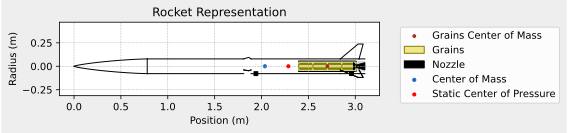


Mass Plots
----------------------------------------


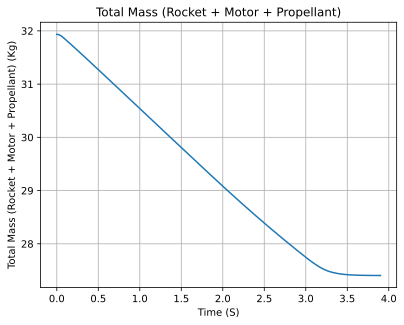

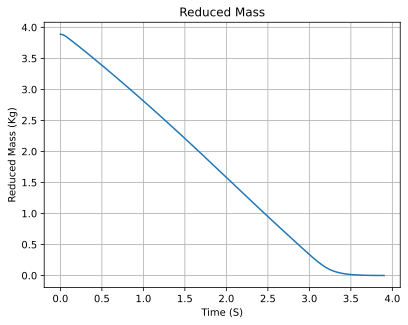


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


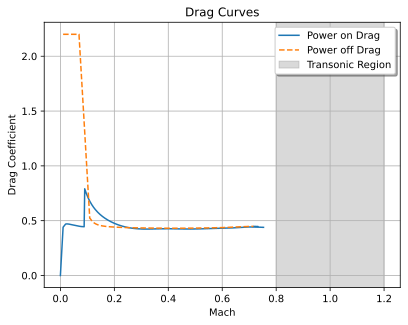


Stability Plots
--------------------


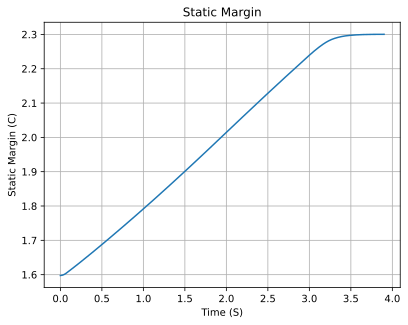

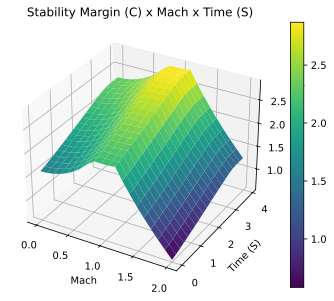


Thrust-to-Weight Plot
----------------------------------------


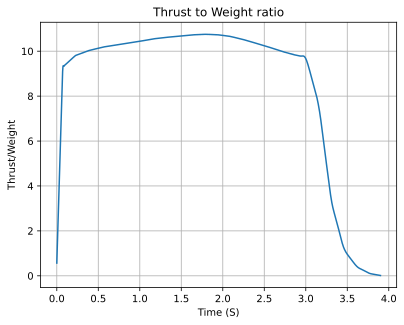

In [ ]:
Excalibur.all_info()


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 1100.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.382 | e1: -0.013 | e2: -0.032 | e3: -0.923
Euler Angles - Spin φ : -135.00° | Nutation θ: -4.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 1.598 c


Surface Wind Conditions

Frontal Surface Wind Speed: -2.37 m/s
Lateral Surface Wind Speed: 0.56 m/s


Launch Rail

Launch Rail Length: 5.17 m
Launch Rail Inclination: 86.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.346 s
Rail Departure Velocity: 26.232 m/s
Rail Departure Stability Margin: 1.661 c
Rail Departure Angle of Attack: 5.254°
Rail Departure Thrust-Weight Ratio: 9.977
Rail Departure Reynolds Number: 2.642e+05


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 1730.776 m (ASL) | 630.776 m (AGL)
Rocket speed at burn out: 266.764 m/s
Freestream 

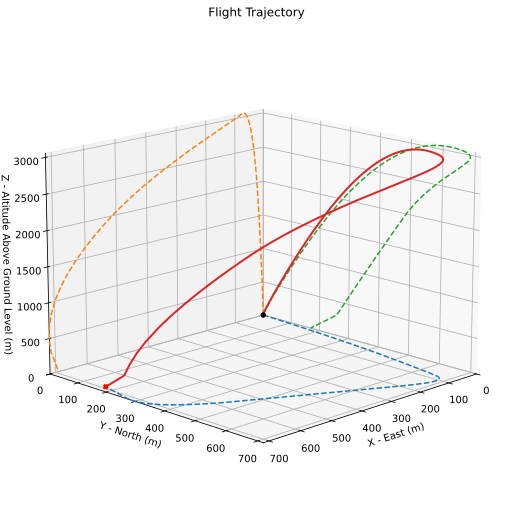



Trajectory Kinematic Plots



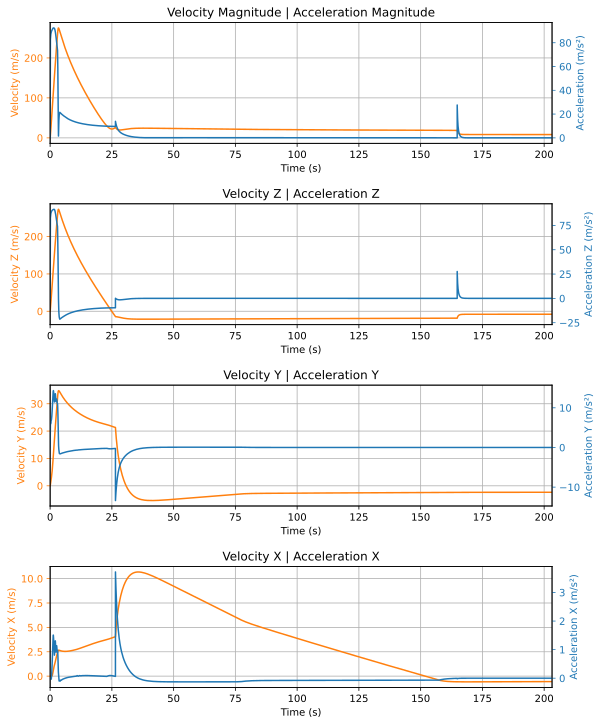



Angular Position Plots



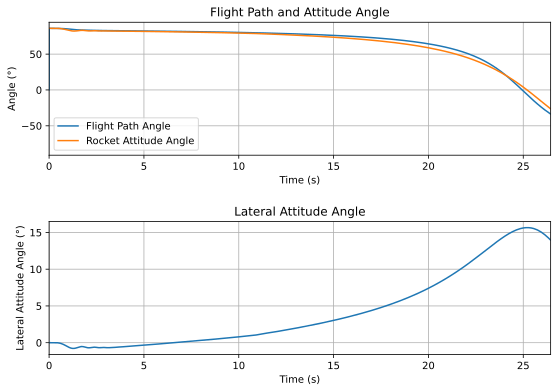



Path, Attitude and Lateral Attitude Angle plots



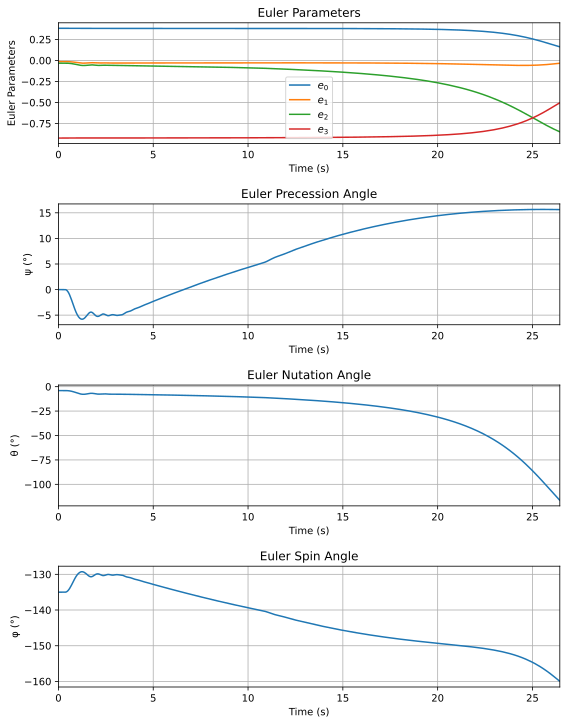



Trajectory Angular Velocity and Acceleration Plots



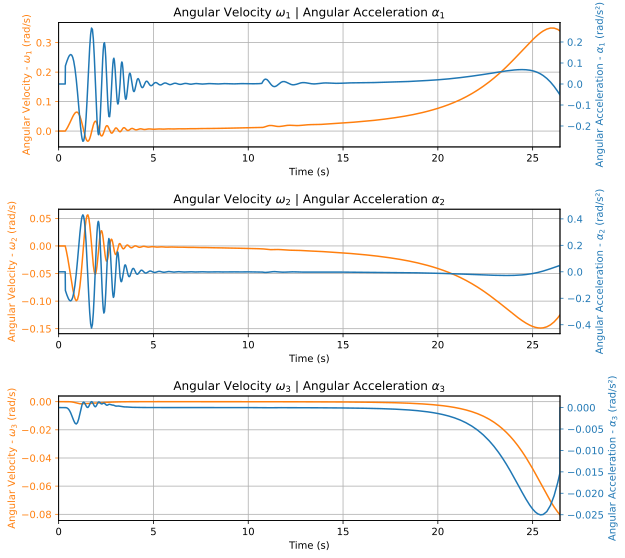



Aerodynamic Forces Plots



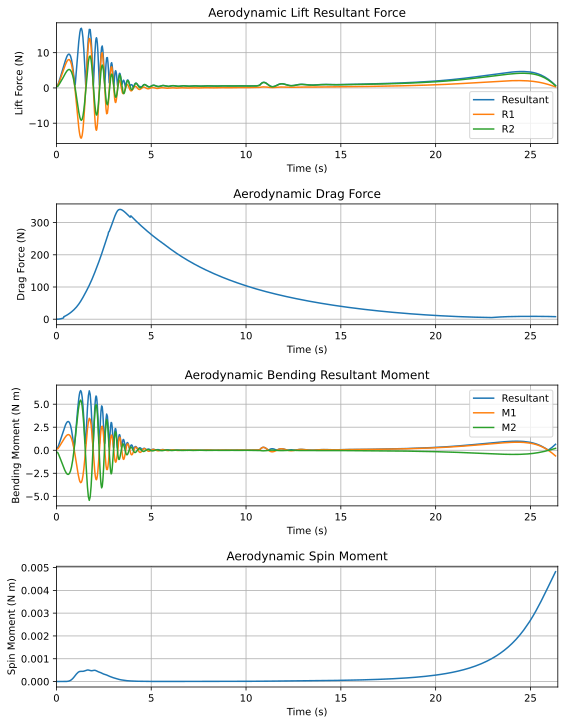



Rail Buttons Forces Plots



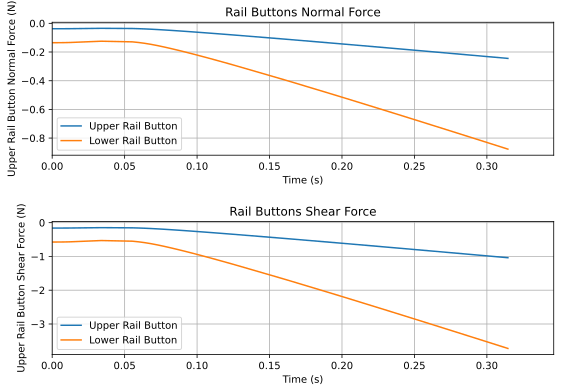



Trajectory Energy Plots



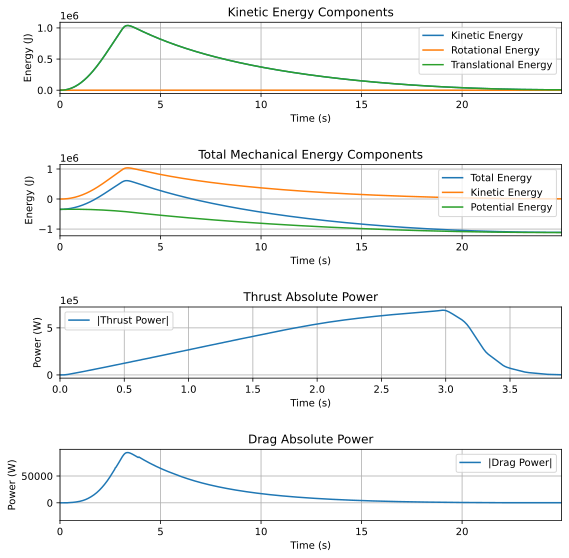



Trajectory Fluid Mechanics Plots



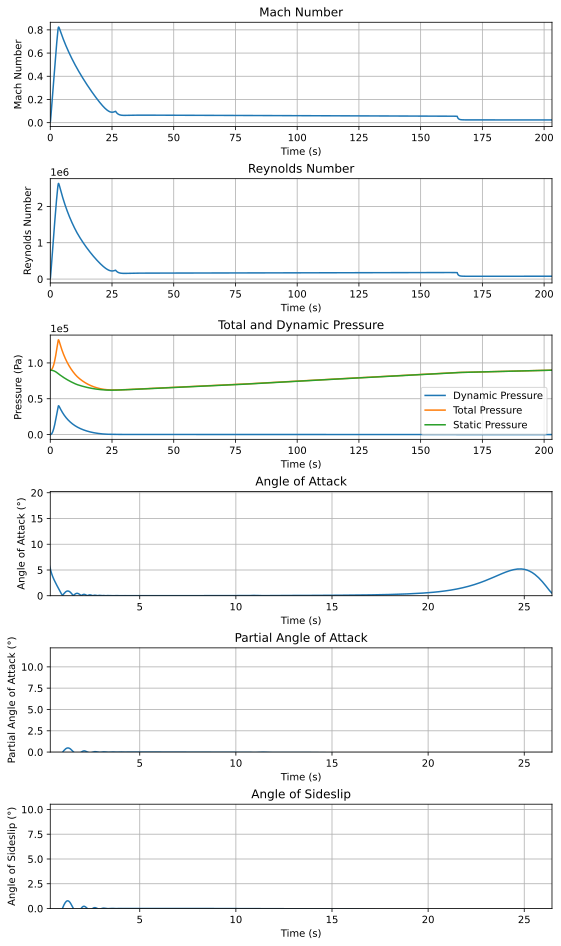



Trajectory Stability and Control Plots



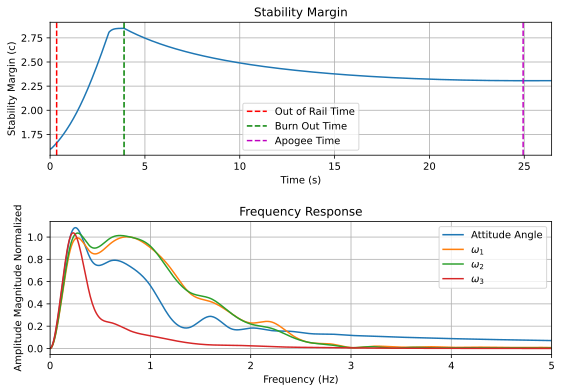



Rocket and Parachute Pressure Plots



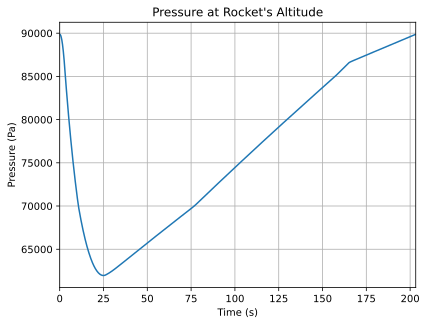


Parachute:  main


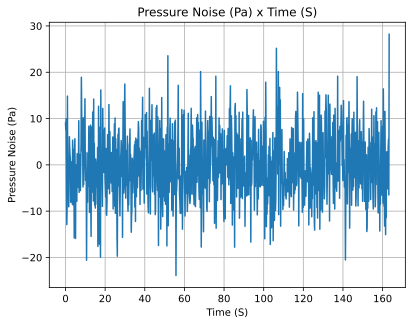

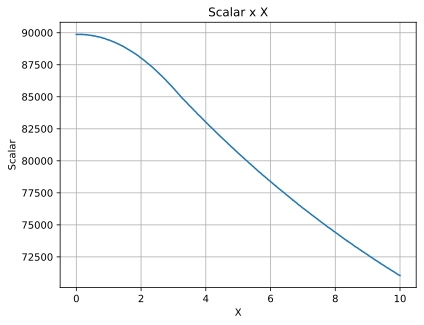

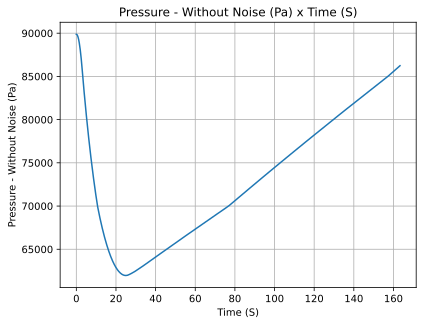


Parachute:  drogue


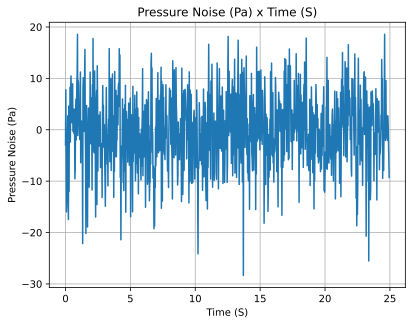

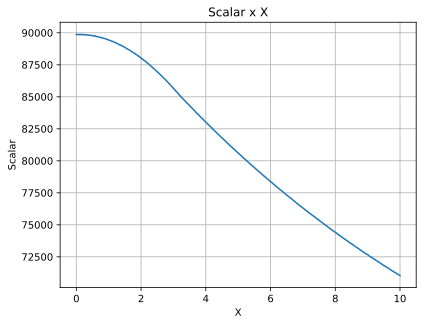

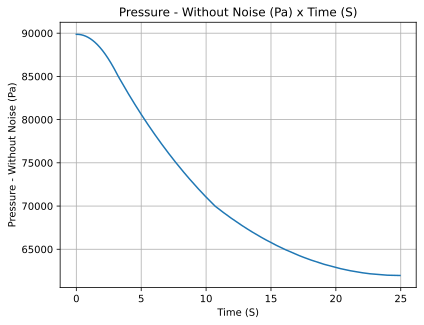

In [ ]:
test_flight = Flight(
  rocket=Excalibur, environment=env, rail_length=5.17, inclination=86, heading=0, max_time = 300
)
test_flight.all_info()

##Fin Optimization (3 Part Optimization Strategy)

In [ ]:
import cvxpy as cp
import numpy as np
from scipy.stats.qmc import LatinHypercube
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import multiprocessing as mp
from contextlib import contextmanager
import copy
import logging
import signal

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

def simulate_single_flight(params):
    """Simulate a single flight with given parameters"""
    try:
        # Convert numpy values to Python floats
        params = [float(p) for p in params]

        local_rocket = copy.deepcopy(Excalibur2)
        if local_rocket.aerodynamic_surfaces:
            local_rocket.aerodynamic_surfaces.pop(-1)

        local_rocket.add_trapezoidal_fins(
            n=4,
            root_chord=params[0],
            tip_chord=params[1],
            span=params[2],
            position=params[3],
            sweep_length=params[4]
        )

        test_flight = Flight(
            rocket=local_rocket,
            environment=custom_env,
            rail_length=6.096,
            inclination=84,
            heading=0,
            max_time_step=0.1,
            max_time=26,
            terminate_on_apogee=True,
            verbose=False,
        )

        static_margin = local_rocket.static_margin(0)
        apogee = test_flight.apogee()

        logger.debug(f"Simulation completed - Apogee: {apogee:.2f}m, Static Margin: {static_margin:.2f}")
        return apogee, static_margin

    except Exception as e:
        logger.error(f"Simulation failed: {str(e)}")
        return None, None

def simulate_flights_in_parallel(samples, max_workers=None):
    """Run flight simulations in parallel with improved error handling"""
    if max_workers is None:
        max_workers = max(1, mp.cpu_count() - 1)

    valid_results = []
    total_samples = len(samples)

    logger.info(f"Starting parallel simulation of {total_samples} samples...")

    # Convert samples to list of lists (from numpy array)
    samples_list = samples.tolist()

    with mp.Pool(processes=max_workers) as pool:
        try:
            # Use imap instead of map for better progress monitoring
            for idx, result in enumerate(pool.imap_unordered(simulate_single_flight, samples_list)):
                apogee, static_margin = result

                if (apogee is not None and
                    static_margin is not None and
                    1.5 <= static_margin <= 2.0):
                    valid_results.append((samples[idx], apogee, static_margin))

                # Log progress
                if (idx + 1) % 5 == 0 or (idx + 1) == total_samples:
                    logger.info(f"Processed {idx + 1}/{total_samples} simulations. "
                              f"Valid results: {len(valid_results)}")

        except Exception as e:
            logger.error(f"Parallel simulation failed: {str(e)}")
            pool.terminate()
            raise

    logger.info(f"Parallel simulation completed. Found {len(valid_results)} valid results")
    return valid_results

def optimize_fins(n_initial_samples=20, max_iterations=10, min_valid_samples=5):
    """Main optimization function"""
    logger.info("Starting optimization process...")

    best_solution = None
    best_apogee = -float('inf')

    X_data = []
    y_data = []

    # Generate initial samples using Latin Hypercube Sampling
    param_ranges = np.array([
        [0.1, 0.5],   # root_chord
        [0.01, 0.2],  # tip_chord
        [0.05, 0.3],  # span
        [2.5, 3.0],   # position
        [0.1, 0.3]    # sweep_length
    ])

    sampler = LatinHypercube(d=5)
    initial_samples = sampler.random(n=n_initial_samples)
    initial_samples = initial_samples * (param_ranges[:, 1] - param_ranges[:, 0]) + param_ranges[:, 0]

    # Enforce tip_chord <= root_chord constraint
    initial_samples[:, 1] = np.minimum(initial_samples[:, 1], initial_samples[:, 0])

    logger.info(f"Evaluating {n_initial_samples} initial samples...")
    valid_results = simulate_flights_in_parallel(initial_samples)

    for sample, apogee, _ in valid_results:
        X_data.append(sample)
        y_data.append(apogee)

        if apogee > best_apogee:
            best_apogee = apogee
            best_solution = sample
            logger.info(f"New best solution found: Apogee = {apogee:.2f}m")

    if len(X_data) < min_valid_samples:
        logger.error(f"Insufficient valid samples ({len(X_data)}) to build surrogate model")
        return best_solution, best_apogee

    scaler = StandardScaler()

    for iteration in range(max_iterations):
        logger.info(f"Starting iteration {iteration + 1}/{max_iterations}")

        X_scaled = scaler.fit_transform(np.array(X_data))
        y_array = np.array(y_data)

        surrogate_model = Ridge(alpha=1.0)
        surrogate_model.fit(X_scaled, y_array)

        solution = solve_cvxpy_problem(surrogate_model, scaler, iteration)

        if solution is not None:
            # Convert solution to list of Python floats
            solution_list = [float(x) for x in solution]
            apogee, static_margin = simulate_single_flight(solution_list)

            if (apogee is not None and
                static_margin is not None and
                1.5 <= static_margin <= 2.0):

                X_data.append(solution)
                y_data.append(apogee)

                if apogee > best_apogee:
                    best_apogee = apogee
                    best_solution = solution
                    logger.info(f"New best solution at iteration {iteration + 1}: "
                              f"Apogee = {apogee:.2f}m")

    return best_solution, best_apogee

if __name__ == '__main__':
    try:
        logger.info("Starting fin optimization process...")
        best_params, best_apogee = optimize_fins()

        if best_params is not None:
            logger.info("\nFinal Optimized Parameters:")
            logger.info(f"Root Chord: {float(best_params[0]):.3f} m")
            logger.info(f"Tip Chord: {float(best_params[1]):.3f} m")
            logger.info(f"Span: {float(best_params[2]):.3f} m")
            logger.info(f"Position: {float(best_params[3]):.3f} m")
            logger.info(f"Sweep Length: {float(best_params[4]):.3f} m")
            logger.info(f"Best Apogee: {best_apogee:.2f} m")
        else:
            logger.error("Optimization failed to find valid solution")

    except Exception as e:
        logger.error(f"Program failed: {str(e)}")

##Fin Optimization (Brute Force Strategy)

In [ ]:
"""
import numpy as np
import copy
from tqdm import tqdm

def check_fin_geometry(root_chord, tip_chord, span, sweep_length):
    """
    Check if fin geometry meets basic constraints for feasibility
    Returns: (bool, str) - (is_valid, reason_if_invalid)
    """
    try:
        # Basic size constraints
        if root_chord < tip_chord:
            return False, "Root chord must be larger than tip chord"

        # Aspect ratio constraints (height/average chord)
        mean_chord = (root_chord + tip_chord) / 2
        aspect_ratio = span / mean_chord
        if aspect_ratio > 4:  # Maximum aspect ratio for structural integrity
            return False, "Aspect ratio too high (>4)"
        if aspect_ratio < 0.5:  # Minimum aspect ratio for effectiveness
            return False, "Aspect ratio too low (<0.5)"

        # Sweep angle constraints
        #if sweep_length > span:  # Sweep can't be more than span
            #return False, "Sweep length exceeds span"

        # Area constraints (minimum 10 sq cm, maximum 200 sq cm)
        """fin_area = (root_chord + tip_chord) * span / 2
        if fin_area < 0.001:  # 10 sq cm in m^2
            return False, "Fin area too small"
        if fin_area > 0.02:   # 200 sq cm in m^2
            return False, "Fin area too large"

        # Structural integrity check (simplified)
        # Tip chord should be at least 30% of root chord for strength
        if tip_chord < 0.3 * root_chord:
            return False, "Tip chord too small relative to root chord"

        return True, "Valid geometry"

    except Exception as e:
        return False, f"Error in geometry check: {e}"

def check_initial_stability(rocket, env):
    """
    Check if rocket meets basic stability criteria before running full simulation
    Returns: (bool, float) - (is_stable, static_margin)
    """
    try:
        # Calculate static margin
        static_margin = rocket.static_margin(0)

        # Check if static margin is in acceptable range
        if not (1.5 <= static_margin <= 1.8):
            return False, static_margin

        # Additional stability checks could be added here
        # For example: CP location relative to CG
        # cp_location = rocket.cp_position
        # cg_location = rocket.cg_position

        return True, static_margin

    except Exception as e:
        print(f"Error in stability check: {e}")
        return False, 0

def simulate_flight(root_chord, tip_chord, span, position, sweep_length):
    """Run a single simulation with the given parameters"""
    try:
        # First check fin geometry
        is_valid_geometry, geometry_reason = check_fin_geometry(
            root_chord, tip_chord, span, sweep_length
        )

        if not is_valid_geometry:
            #print(f"Skipping invalid geometry: {geometry_reason}")
            return 0, 0

        # Create fresh copies for stability check
        Excalibur2 = copy.deepcopy(Excalibur)
        custom_env = Environment()
        custom_env.set_atmospheric_model(type="custom_atmosphere", wind_v=-5)

        # Modify rocket fin set
        Excalibur2.aerodynamic_surfaces.pop(-1)
        fin_set = Excalibur2.add_trapezoidal_fins(
            n=4,
            root_chord=root_chord,
            tip_chord=tip_chord,
            span=span,
            position=2.68,
            sweep_length=sweep_length
        )

        # Check stability before running full simulation
        is_stable, static_margin = check_initial_stability(Excalibur2, custom_env)

        if not is_stable:
            #print(f"Skipping unstable configuration (SM: {static_margin:.2f})")
            return 0, static_margin

        # If we get here, run the full simulation
        test_flight = Flight(
            rocket=Excalibur2,
            environment=custom_env,
            rail_length=6.096,
            inclination=84,
            heading=0,
            max_time_step=0.1,
            max_time=26,
            terminate_on_apogee=True,
            verbose=False,
        )

        return test_flight.apogee, static_margin

    except Exception as e:
        print(f"Error in simulation: {e}")
        return 0, 0

def main():
    # Define parameter ranges (3 points each = 243 total combinations)
    root_chord_range = np.linspace(0.15, 0.35, 10)
    tip_chord_range = np.linspace(0.05, 0.8, 5)
    span_range = np.linspace(0.08, 0.15, 10)
    #position_range = np.linspace(2.5, 3.0, 20)
    sweep_length_range = np.linspace(0.15, 0.3, 15)

    # Calculate total iterations
    total_iterations = len(root_chord_range) * len(tip_chord_range) * len(span_range) * \
                      len(sweep_length_range)
    print(f"Total configurations to test: {total_iterations}")

    # Initialize best values
    best_apogee = 0
    best_params = None
    best_static_margin = None

    # Count valid configurations
    total_checked = 0
    valid_geometries = 0
    stable_configs = 0
    successful_sims = 0

    # Create progress bar
    pbar = tqdm(total=total_iterations, desc="Testing configurations")

    # Brute force nested loops
    for root_chord in root_chord_range:
        for tip_chord in tip_chord_range:
            for span in span_range:
                    for sweep_length in sweep_length_range:
                        total_checked += 1

                        # Check geometry first
                        is_valid_geometry, _ = check_fin_geometry(
                            root_chord, tip_chord, span, sweep_length
                        )

                        if is_valid_geometry:
                            valid_geometries += 1

                            # Run simulation (includes stability check)
                            apogee, static_margin = simulate_flight(
                                root_chord, tip_chord, span, 2.68, sweep_length
                            )

                            if static_margin > 0:  # Was stable enough to check
                                stable_configs += 1

                            if apogee > 0:  # Completed successful simulation
                                successful_sims += 1

                                # Update best values if better than previous
                                if apogee > best_apogee:
                                    best_apogee = apogee
                                    best_params = (root_chord, tip_chord, span, 2.68, sweep_length)
                                    best_static_margin = static_margin

                        # Update progress bar
                        pbar.update(1)

    pbar.close()

    # Print statistics
    print("\nSimulation Statistics:")
    print(f"Total configurations checked: {total_checked}")
    print(f"Valid geometries: {valid_geometries} ({valid_geometries/total_checked*100:.1f}%)")
    print(f"Stable configurations: {stable_configs} ({stable_configs/total_checked*100:.1f}%)")
    print(f"Successful simulations: {successful_sims} ({successful_sims/total_checked*100:.1f}%)")

    # Check if we found a valid configuration
    if best_params is None:
        print("\nNo valid configuration found!")
        return

    # Print optimized parameters
    print("\nBest Fin Parameters Found:")
    print(f"Root Chord: {best_params[0]:.3f} m")
    print(f"Tip Chord: {best_params[1]:.3f} m")
    print(f"Span: {best_params[2]:.3f} m")
    #print(f"Position: {best_params[3]:.3f} m")
    print(f"Sweep Length: {best_params[4]:.3f} m")

    # Create final simulation with best parameters
    try:
        final_rocket = copy.deepcopy(Excalibur)
        final_env = Environment()
        final_env.set_atmospheric_model(type="custom_atmosphere", wind_v=-5)

        final_rocket.aerodynamic_surfaces.pop(-1)
        final_rocket.add_trapezoidal_fins(
            n=4,
            root_chord=best_params[0],
            tip_chord=best_params[1],
            span=best_params[2],
            position=2.68,
            sweep_length=best_params[4]
        )

        # Create final flight for visualization
        final_flight = Flight(
            rocket=final_rocket,
            environment=final_env,
            rail_length=6.096,
            inclination=84,
            heading=0,
            max_time_step=0.01,
            max_time=45,
            terminate_on_apogee=True,
            verbose=True,
        )

        print(f"\nFinal Results:")
        print(f"Apogee: {best_apogee:.2f} m")
        print(f"Static Margin at Ignition: {best_static_margin:.2f} calibers")
        print(f"Static Margin at Burnout: {final_rocket.static_margin(final_rocket.motor.burn_out_time):.2f} calibers")

        # Plot trajectory
        final_flight.trajectory.plot_3d()

    except Exception as e:
        print(f"Error in final simulation: {e}")

if __name__ == '__main__':
    main()


#Airfoil Optimization

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Tuple

@dataclass
class AirProperties:
    """Enhanced air properties with more detailed atmospheric modeling"""
    gamma: float = 1.4      # Specific heat ratio
    R: float = 1716.0       # Gas constant [ft⋅lb/slug⋅°R]
    temp: float = 518.7     # Temperature [°R]
    rho: float = 0.002377   # Density [slug/ft³]
    mu: float = 3.737e-7    # Dynamic viscosity [lb⋅s/ft²]
    altitude: float = 0.0   # Altitude for more precise atmospheric corrections

@dataclass
class GeometryEffectFactors:
    """
    Dataclass to capture the aerodynamic impact of geometric parameters

    This class quantifies how leading edge radius, trailing edge angle,
    and leading edge angle modify aerodynamic characteristics
    """
    reynolds_factor: float = 1.0
    lift_factor: float = 1.0
    drag_factor: float = 1.0


class RocketFinOptimizer:
    def __init__(self, mach=0.75, thickness=0.25, chord_length=None, fin_height=None, altitude: float = 0.0):

        self.mach = mach
        self.thickness = thickness  # inches
        self.chord_length = chord_length  # inches
        self.fin_height = fin_height  # inches
        self.air = AirProperties()
        # Enhanced air properties with altitude correction
        self.air = self._calculate_air_properties(altitude)

        # Critical Mach number with more nuanced calculation
        self.M_crit = 0.75 + 0.05 * (altitude / 10000)

        # Expanded optimization bounds
        self.le_radius_bounds = (0.03125, 0.09375)     # inches (1/16" to 1/8")
        self.te_angle_bounds = (37.5, 75)             # degrees
        self.le_angle_bounds = (42.5, 75)             # Leading edge angle in degrees
    def calculate_geometry_effect_factors(self,
                                          le_radius: float,
                                          te_angle: float,
                                          le_angle: float) -> GeometryEffectFactors:
        """
        Calculate comprehensive geometric effect factors

        Args:
            le_radius: Leading edge radius
            te_angle: Trailing edge angle
            le_angle: Leading edge angle

        Returns:
            GeometryEffectFactors quantifying aerodynamic modifications
        """
        # Normalized geometric parameters
        radius_ratio = le_radius / self.chord_length
        te_angle_ratio = te_angle / 45.0  # Normalized to typical range
        le_angle_ratio = le_angle / 45.0  # Normalized leading edge angle

        # Reynolds number modification
        reynolds_factor = (
            1 - 0.2 * radius_ratio +  # Radius effect
            0.1 * (te_angle_ratio - 0.5) +  # Trailing edge angle impact
            0.05 * (le_angle_ratio - 0.5)  # Leading edge angle contribution
        )

        # Lift coefficient modification
        lift_factor = (
            1 + 0.5 * radius_ratio +  # Radius increases lift potential
            0.3 * (te_angle_ratio - 0.5) +  # Trailing edge angle affects lift
            0.2 * (le_angle_ratio - 0.5)  # Leading edge angle lift interaction
        )

        # Drag coefficient modification
        drag_factor = (
            1 + 0.3 * radius_ratio +  # Radius increases form drag
            0.2 * (te_angle_ratio - 0.5) +  # Trailing edge angle pressure drag
            0.1 * (le_angle_ratio - 0.5)  # Leading edge angle drag contribution
        )

        return GeometryEffectFactors(
            reynolds_factor=reynolds_factor,
            lift_factor=lift_factor,
            drag_factor=drag_factor
        )

    def reynolds_number(self, le_radius: float, te_angle: float, le_angle: float) -> float:
        """
        Calculate Reynolds number with comprehensive geometric considerations

        Args:
            le_radius: Leading edge radius
            te_angle: Trailing edge angle
            le_angle: Leading edge angle

        Returns:
            Modified Reynolds number
        """
        # Base velocity calculation
        velocity = self.mach * np.sqrt(self.air.gamma * self.air.R * self.air.temp)

        # Geometry effect factors
        geo_factors = self.calculate_geometry_effect_factors(le_radius, te_angle, le_angle)

        # Effective chord length modification
        effective_chord = self.chord_length * (1 - 0.1 * (le_radius / self.chord_length))

        # Reynolds number with geometric modifications
        return (self.air.rho * velocity * effective_chord) / self.air.mu * geo_factors.reynolds_factor



    def calculate_cd(self, le_radius: float, te_angle: float, le_angle: float, aoa_deg: float) -> float:
        """
        Calculate drag coefficient with advanced geometric parameter integration

        Args:
            le_radius: Leading edge radius
            te_angle: Trailing edge angle
            le_angle: Leading edge angle
            aoa_deg: Angle of attack in degrees

        Returns:
            Total drag coefficient
        """
        aoa_rad = np.radians(aoa_deg)

        # Geometry effect factors
        geo_factors = self.calculate_geometry_effect_factors(le_radius, te_angle, le_angle)

        # Reynolds number calculation
        Re = self.reynolds_number(le_radius, te_angle, le_angle)

        # Compressibility factor
        beta = self.prandtl_glauert_factor()

        # Thickness ratio
        t_c = self.thickness / self.chord_length

        # Skin friction coefficient with geometric corrections
        cf = 0.455 / (np.log10(Re)**2.58)

        # Form factor with geometric parameter integration
        FF = self.calculate_form_factor(le_radius, te_angle, le_angle)

        # Profile drag
        cd_profile = cf * FF * beta

        # Pressure and wave drag components
        cd_pressure = 0.002 * (t_c / 0.06)**2
        cd_wave = self.calculate_wave_drag(t_c, aoa_rad, le_angle)

        # Induced drag calculation
        aspect_ratio = (self.fin_height**2) / (self.chord_length * self.fin_height)
        e = 0.9  # Oswald efficiency factor
        cl = self.calculate_cl(le_radius, te_angle, aoa_deg, le_angle)
        cd_induced = (cl**2) / (np.pi * aspect_ratio * e)

        # Total drag with geometric factor integration
        cd_total = (cd_profile + cd_pressure + cd_wave + cd_induced) * geo_factors.drag_factor

        # Angle of attack effects
        cd_aoa = 2 * np.sin(aoa_rad)**2

        return cd_total + cd_aoa

    def calculate_cl(self, le_radius: float, te_angle: float, aoa_deg: float, le_angle: float) -> float:
        """
        Calculate lift coefficient with advanced geometric considerations

        Args:
            aoa_deg: Angle of attack in degrees
            le_angle: Leading edge angle

        Returns:
            Lift coefficient
        """
        # Geometry effect factors
        geo_factors = self.calculate_geometry_effect_factors(
            le_radius,  # Representative radius
            te_angle,  # Representative trailing edge angle
            le_angle
        )

        aoa_rad = np.radians(aoa_deg)
        beta = self.prandtl_glauert_factor()

        # Base lift coefficient calculation
        cl_incompressible = 2 * np.pi * aoa_rad

        # Apply compressibility and geometric corrections
        cl = cl_incompressible * beta * geo_factors.lift_factor

        # Reynolds number and thickness effects
        Re = self.reynolds_number(
            le_radius,  # Representative radius
            te_angle,  # Representative trailing edge angle
            le_angle
        )
        if Re < 1e6:
            cl *= 0.9

        # Thickness correction
        t_c = self.thickness / self.chord_length
        cl *= (1 + 0.77 * t_c)

        return cl

    def _calculate_air_properties(self, altitude: float) -> AirProperties:
        """
        Calculate atmospheric properties based on altitude
        Uses a simplified atmospheric model with key corrections

        Args:
            altitude: Altitude in feet

        Returns:
            Modified AirProperties instance
        """
        # Atmospheric layer corrections
        temp_lapse_rate = -0.0019812  # °R per foot
        pressure_scale_height = 23000  # feet

        # Temperature correction
        corrected_temp = self.air.temp + (temp_lapse_rate * altitude)

        # Density correction using barometric formula
        density_ratio = np.exp(-altitude / pressure_scale_height)
        corrected_density = self.air.rho * density_ratio

        # Dynamic viscosity correction with Sutherland's law
        viscosity_temp_ref = 491.67  # Reference temperature
        sutherland_const = 198.6     # Sutherland's constant

        viscosity_ratio = ((corrected_temp / viscosity_temp_ref) ** 1.5) * \
                          ((viscosity_temp_ref + sutherland_const) /
                           (corrected_temp + sutherland_const))

        corrected_mu = self.air.mu * viscosity_ratio

        return AirProperties(
            temp=corrected_temp,
            rho=corrected_density,
            mu=corrected_mu,
            altitude=altitude
        )

    def prandtl_glauert_factor(self) -> float:
        """
        Enhanced Prandtl-Glauert compressibility correction
        Includes more accurate high-speed flow considerations
        """
        # Add additional correction for transonic and near-sonic regimes
        if self.mach < 1.0:
            return 1 / np.sqrt(1 - self.mach**2)
        else:
            # More complex correction for supersonic flows
            return np.sqrt(self.mach**2 - 1)

    def calculate_wave_drag(self, thickness_ratio: float,
                             aoa_rad: float,
                             le_angle: float) -> float:
        """
        Advanced wave drag calculation incorporating leading edge effects

        Args:
            thickness_ratio: Thickness to chord ratio
            aoa_rad: Angle of attack in radians
            le_angle: Leading edge angle in degrees

        Returns:
            Wave drag coefficient
        """
        if self.mach < self.M_crit:
            return 0.0

        # More sophisticated wave drag model
        delta_mach = self.mach - self.M_crit

        # Incorporate leading edge angle's impact on wave drag
        le_angle_factor = 1 + 0.1 * (le_angle / 15)

        return (20 * thickness_ratio * delta_mach**4 *
                (1 + 4 * aoa_rad**2) * le_angle_factor)

    def calculate_form_factor(self,
                               le_radius: float,
                               te_angle: float,
                               le_angle: float) -> float:
        """
        Enhanced form factor calculation with more parameters

        Args:
            le_radius: Leading edge radius
            te_angle: Trailing edge angle
            le_angle: Leading edge angle

        Returns:
            Modified form factor
        """
        t_c = self.thickness / self.chord_length
        r_c = le_radius / self.chord_length

        # More comprehensive form factor
        FF = 1 + 2.7 * t_c + 100 * t_c**4
        FF *= (1 + 0.5 * (1 - r_c/0.03)**2)
        FF *= (1 + 0.002 * (te_angle - 5))
        FF *= (1 + 0.001 * (le_angle - 5)**2)  # New leading edge angle contribution

        return FF

    def objective_function(self, x: np.ndarray, aoa: float = 0) -> float:
        """
        Advanced objective function for optimization

        Args:
            x: Optimization parameters [le_radius, te_angle, le_angle]
            aoa: Angle of attack

        Returns:
            Weighted performance metric
        """
        le_radius, te_angle, le_angle = x

        cd = self.calculate_cd(le_radius, te_angle, le_angle, aoa)
        cl = self.calculate_cl(le_radius, te_angle, aoa, le_angle)

        # More sophisticated weighting considering multiple performance criteria
        return (0.6 * cd +       # Primary focus on drag reduction
                0.2 * abs(cl) +   # Moderate lift consideration
                0.1 * te_angle +  # Slight preference for larger trailing edge angles
                0.1 * le_angle)   # Slight preference for moderate leading edge angles

    def optimize_parameters(self) -> np.ndarray:
        """
        Advanced parameter optimization with expanded search space

        Returns:
            Optimized parameters [le_radius, te_angle, le_angle]
        """
        x0 = [0.09375, 60, 60]  # Initial guess
        bounds = [
            self.le_radius_bounds,
            self.te_angle_bounds,
            self.le_angle_bounds
        ]

        result = minimize(
            self.objective_function,
            x0,
            bounds=bounds,
            method='L-BFGS-B'
        )

        return result.x

    def generate_polar(self, le_radius, te_angle, le_angle, aoa_range=(-10, 10)):
        """
        Generate lift and drag polars for given parameters
        aoa_range: tuple of (min, max) angles in degrees
        """
        aoa = np.linspace(aoa_range[0], aoa_range[1], 100)
        cl = np.array([self.calculate_cl(le_radius, te_angle, a, le_angle) for a in aoa])
        cd = np.array([self.calculate_cd(le_radius, te_angle, le_angle, a) for a in aoa])

        return aoa, cl, cd

    def plot_results(self, le_radius, te_angle, le_angle):
        """Plot Cl vs AoA and Cd vs AoA with detailed annotations"""
        aoa, cl, cd = self.generate_polar(le_radius, te_angle, le_angle)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

        # Lift coefficient plot
        ax1.plot(aoa, cl, 'b-', label='Cl')
        ax1.set_xlabel('Angle of Attack (degrees)')
        ax1.set_ylabel('Lift Coefficient (Cl)')
        ax1.grid(True)
        ax1.set_title(f'Lift Coefficient vs Angle of Attack\nMach {self.mach}')

        # Drag coefficient plot
        ax2.plot(aoa, cd, 'r-', label='Cd')
        ax2.set_xlabel('Angle of Attack (degrees)')
        ax2.set_ylabel('Drag Coefficient (Cd)')
        ax2.grid(True)
        ax2.set_title(f'Drag Coefficient vs Angle of Attack\nMach {self.mach}')

        # Add Reynolds number and other key parameters
        Re = self.reynolds_number(le_radius, te_angle, le_angle)
        fig.suptitle(f'Fin Aerodynamic Characteristics\n' +
                    f'Re = {Re:.2e}, t/c = {self.thickness/self.chord_length:.3f}\n' +
                    f'LE Radius = {le_radius:.4f} in, TE Angle = {te_angle:.1f}°, LE Angle = {le_angle:.1f}°',
                    y=1.05)

        plt.tight_layout()
        return fig

# Example usage
if __name__ == "__main__":
    optimizer = RocketFinOptimizer(
        mach=0.75,
        thickness=0.265,
        chord_length=7.875,
        fin_height=6.25,
        altitude=5000
    )

    # Optimize with three parameters
    optimal_params = optimizer.optimize_parameters()

    print(f"Optimal leading edge radius: {optimal_params[0]:.4f} inches")
    print(f"Optimal trailing edge angle: {optimal_params[1]:.2f} degrees")
    print(f"Optimal leading edge angle: {optimal_params[2]:.2f} degrees")
    optimal_le_radius = optimal_params[0]
    optimal_te_angle = optimal_params[1]
    optimal_le_angle = optimal_params[2]
    # Generate and save polar data
    aoa, cl, cd = optimizer.generate_polar(optimal_le_radius, optimal_te_angle, optimal_le_angle)

    # Save data to CSV with clear headers
    np.savetxt('fin_polars.csv',
               np.column_stack((aoa, cl)),
               delimiter=',',
               header='AOA_degrees,Cl',
               comments='')

    # Create plots
    fig = optimizer.plot_results(optimal_le_radius, optimal_te_angle, optimal_le_angle)
    plt.savefig('fin_polars.png', bbox_inches='tight', dpi=300)
    plt.close()

Optimal leading edge radius: 0.0938 inches
Optimal trailing edge angle: 37.50 degrees
Optimal leading edge angle: 42.50 degrees


# Dispersion Analysis (OLD PLEASE IGNORE, ONLY FOR DEBUGGING)

In [ ]:
!curl -o dispersion_analysis_inputs/Cd_PowerOff.csv --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/Cd_PowerOff.csv
!curl -o dispersion_analysis_inputs/Cd_PowerOn.csv --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/Cd_PowerOn.csv
!curl -o dispersion_analysis_inputs/LASC2019_reanalysis.nc --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/LASC2019_reanalysis.nc
!curl -o dispersion_analysis_inputs/thrustCurve.csv --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/thrustCurve.csv
!curl -o dispersion_analysis_inputs/Excalibur_basemap_final.jpg --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/Excalibur_basemap_final.jpg
!mkdir -p dispersion_analysis_outputs

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     61      0 --:--:-- --:--:-- --:--:--    61
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     72      0 --:--:-- --:--:-- --:--:--    72
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     84      0 --:--:-- --:--:-- --:--:--    84
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     84      0 --:--:-- --:--:-- --:--:--    84
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
!pip install rocketpy imageio

In [ ]:
from time import process_time, time

from rocketpy import Environment, SolidMotor, Rocket, Flight

import numpy as np
from numpy.random import normal, choice
from IPython.display import display

In [ ]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams["figure.figsize"] = [8, 5]
mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["font.size"] = 14
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["figure.titlesize"] = 14

In [ ]:
analysis_parameters = {
    # Mass Details
    # Rocket's dry mass without motor (kg) and its uncertainty (standard deviation)
    "rocket_mass": (23.905, 0.4),
    # Rocket's inertia moment perpendicular to its axis (kg*m^2)
    "rocket_inertia_11": (18.02223752, 0.03675),
    # Rocket's inertia moment relative to its axis (kg*m^2)
    "rocket_inertia_33": (0.1015014106, 0.00007),
    # Motors's dry mass without propellant (kg) and its uncertainty (standard deviation)
    "motor_dry_mass": (3494/1000, 0.1),
    # Motor's dry inertia moment perpendicular to its axis (kg*m^2)
    "motor_inertia_11": (0.2518481455314, 0.01675),
    # Motors's dry inertia moment relative to its axis (kg*m^2)
    "motor_inertia_33": (0.2518481455314, 0.00003),
    # Distance between rocket's center of dry mass and motor's center of dry mass (m)
    "motor_dry_mass_position": (0.752 - 0.35871749, 0.2),
    # Propulsion Details - run help(SolidMotor) for more information
    # Motor total impulse (N*s)
    "impulse": (9,671.0, 123),
    # Motor burn out time (s)
    "burn_time": (3.9, 0.3),
    # Motor's nozzle radius (m)
    "nozzle_radius": (1.5*2.54/100, 0.5 / 1000),
    # Motor's nozzle throat radius (m)
    "throat_radius": (2.54/200, 0.5 / 1000),
    # Motor's grain separation (axial distance between two grains) (m)
    "grain_separation": (2.54/1600, 1 / 1000),
    # Motor's grain density (kg/m^3)
    "grain_density": (1560, 50),
    # Motor's grain outer radius (m)
    "grain_outer_radius": (3.37 * 2.54/(2 * 100), 0.375 / 1000),
    # Motor's grain inner radius (m)
    "grain_initial_inner_radius": ((3.506216/(2*100)), 0.375 / 1000),
    # Motor's grain height (m)
    "grain_initial_height": (0.1524 - (2.54/3200), 1 / 1000),
    # Aerodynamic Details - run help(Rocket) for more information
    # Rocket's radius (kg*m^2)
    "radius": (6.17 * 2.54/200, 0.001),
    # Distance between rocket's center of dry mass and nozzle exit plane (m) (negative)
    "nozzle_position": (0, 0.01),
    # Distance between rocket's center of dry mass and and center of propellant mass (m) (negative)
    "grains_center_of_mass_position": (0.752 - 0.37224932 + 0.02, 0.01),
    # Multiplier for rocket's drag curve. Usually has a mean value of 1 and a uncertainty of 5% to 10%
    "power_off_drag": (0.9081 / 1.05, 0.033),
    # Multiplier for rocket's drag curve. Usually has a mean value of 1 and a uncertainty of 5% to 10%
    "power_on_drag": (0.9081 / 1.05, 0.033),
    # Rocket's nose cone length (m)
    "nose_length": (0.781, 0.001),
    # Axial distance between rocket's center of dry mass and nearest point in its nose cone (m)
    "nose_distance": (0, 0.001),
    # Fin span (m)
    "fin_span": (0.165, 0.0005),
    # Fin root chord (m)
    "fin_root_chord": (0.201, 0.0005),
    # Fin tip chord (m)
    "fin_tip_chord": (0.051, 0.0005),
    # Fin Sweep length (m)
    "fin_sweep_length": (0.197, 0.0005),
    # Axial distance between rocket's center of dry mass and nearest point in its fin (m)
    "fin_distance": (2.84, 0.001),
    # Launch and Environment Details - run help(Environment) and help(Flight) for more information
    # Launch rail inclination angle relative to the horizontal plane (degrees)
    "inclination": (84, 1),
    # Launch rail heading relative to north (degrees)
    "heading": (0, 2),
    # Launch rail length (m)
    "rail_length": (5.17, 0.0005),
    # Members of the ensemble forecast to be used
    "ensemble_member": list(range(10)),
    # Parachute Details - run help(Rocket) for more information
    # Drag coefficient times reference area for the drogue chute (m^2)
    "cd_s_drogue": ((np.pi * (0.914/2) ** 2), 0.9),
    "cd_s_main": ((np.pi * (2.13/2) ** 2) * 2.2, 0.9),
    # Time delay between parachute ejection signal is detected and parachute is inflated (s)
    "lag_rec": (1.5, 0.5),
    # Electronic Systems Details - run help(Rocket) for more information
    # Time delay between sensor signal is received and ejection signal is fired (s)
    "lag_se": (0.73, 0.16),
}

In [ ]:
def flight_settings(analysis_parameters, total_number):
    i = 0
    while i < total_number:
        # Generate a flight setting
        flight_setting = {}
        for parameter_key, parameter_value in analysis_parameters.items():
            if type(parameter_value) is tuple:
                flight_setting[parameter_key] = normal(*parameter_value)
            else:
                flight_setting[parameter_key] = choice(parameter_value)

        # Skip if certain values are negative, which happens due to the normal curve but isnt realistic
        if flight_setting["lag_rec"] < 0 or flight_setting["lag_se"] < 0:
            continue

        # Update counter
        i += 1
        # Yield a flight setting
        yield flight_setting

In [ ]:
def export_flight_data(flight_setting, flight_data, exec_time):
    # Generate flight results
    flight_result = {
        "out_of_rail_time": flight_data.out_of_rail_time,
        "out_of_rail_velocity": flight_data.out_of_rail_velocity,
        "max_velocity": flight_data.speed.max,
        "apogee_time": flight_data.apogee_time,
        "apogee_altitude": flight_data.apogee - Env.elevation,
        "apogee_x": flight_data.apogee_x,
        "apogee_y": flight_data.apogee_y,
        "impact_time": flight_data.t_final,
        "impact_x": flight_data.x_impact,
        "impact_y": flight_data.y_impact,
        "impact_velocity": flight_data.impact_velocity,
        "initial_static_margin": flight_data.rocket.static_margin(0),
        "out_of_rail_static_margin": flight_data.rocket.static_margin(
            flight_data.out_of_rail_time
        ),
        "final_static_margin": flight_data.rocket.static_margin(
            flight_data.rocket.motor.burn_out_time
        ),
        "number_of_events": len(flight_data.parachute_events),
        "execution_time": exec_time,
    }

    # Take care of parachute results
    #print(flight_data.parachute_events)
    if len(flight_data.parachute_events) > 0:
        flight_result["drogue_triggerTime"] = flight_data.parachute_events[0][0]
        flight_result["drogue_inflated_time"] = (
            flight_data.parachute_events[0][0] + flight_data.parachute_events[0][1].lag
        )
        flight_result["drogue_inflated_velocity"] = flight_data.speed(
            flight_data.parachute_events[0][0] + flight_data.parachute_events[0][1].lag
        )
        flight_result["main_triggerTime"] = flight_data.parachute_events[1][0]
        flight_result["main_inflated_time"] = (
            flight_data.parachute_events[1][0] + flight_data.parachute_events[1][1].lag
        )
        flight_result["main_inflated_velocity"] = flight_data.speed(
            flight_data.parachute_events[1][0] + flight_data.parachute_events[1][1].lag
        )
    else:
        flight_result["drogue_triggerTime"] = 0
        flight_result["drogue_inflated_time"] = 0
        flight_result["drogue_inflated_velocity"] = 0
        flight_result["main_triggerTime"] = 0
        flight_result["main_inflated_time"] = 0
        flight_result["main_inflated_velocity"] = 0
    # Write flight setting and results to file
    dispersion_input_file.write(str(flight_setting) + "\n")
    dispersion_output_file.write(str(flight_result) + "\n")


def export_flight_error(flight_setting):
    dispersion_error_file.write(str(flight_setting) + "\n")

In [ ]:
# Basic analysis info
filename = "monte_carlo_analysis_outputs/Excalibur_rocket_v0"
number_of_simulations = 100

# Create data files for inputs, outputs and error logging
dispersion_error_file = open("/content/IREC25/IREC25/disp_errors.txt", "w")
dispersion_input_file = open("/content/IREC25/IREC25/disp_inputs.txt.txt", "w")
dispersion_output_file = open("/content/IREC25/IREC25/disp_outputs.txt.txt", "w")

# Initialize counter and timer
i = 0

initial_wall_time = time()
initial_cpu_time = process_time()

# Define basic Environment object
"""
Env = Environment(date=(2019, 8, 10, 21), latitude=-23.363611, longitude=-48.011389)
Env.set_elevation(668)
Env.max_expected_height = 1500
Env.set_atmospheric_model(
    type="Ensemble",
    dictionary="ECMWF"
)
"""
now_plus_twelve = datetime.datetime.now() + datetime.timedelta(hours=12)

Env = Environment(
    date=now_plus_twelve,
    latitude=32.988528,
    longitude=-106.975056,
)
Env.set_atmospheric_model(type="Forecast", file="RAP")
Env._max_expected_height = 4500
#env.plots.atmospheric_model()
# Set up parachutes. This rocket, named Excalibur, only has a drogue chute.
def drogue_trigger(p, h, y):
    # Check if rocket is going down, i.e. if it has passed the apogee
    vertical_velocity = y[5]
    # Return true to activate parachute once the vertical velocity is negative
    return True if vertical_velocity < 0 else False

def main_trigger(p, h, y):
    # Check if rocket is going down, i.e. if it has passed the apogee
    vertical_height = h[5]
    # Return true to activate parachute once the vertical velocity is negative
    return True if vertical_height < 0 else False

# Iterate over flight settings
out = display("Starting", display_id=True)
for setting in flight_settings(analysis_parameters, number_of_simulations):
    start_time = process_time()
    i += 1

    # Update environment object
    #env.select_ensemble_member(setting["ensemble_member"])

    # Create motor
    M2500 = SolidMotor(
        thrust_source="/content/IREC25/thrust_curve.csv",
        burn_time=4.264,
        #reshape_thrust_curve=(setting["burn_time"], setting["impulse"]),
        nozzle_radius=setting["nozzle_radius"],
        throat_radius=setting["throat_radius"],
        grain_number=4,
        grain_separation=setting["grain_separation"],
        grain_density=setting["grain_density"],
        grain_outer_radius=setting["grain_outer_radius"],
        grain_initial_inner_radius=setting["grain_initial_inner_radius"],
        grain_initial_height=setting["grain_initial_height"],
        interpolation_method="spline",
        coordinate_system_orientation="nozzle_to_combustion_chamber",
        nozzle_position=setting["nozzle_position"],
        grains_center_of_mass_position=setting["grains_center_of_mass_position"],
        dry_mass=setting["motor_dry_mass"],
        dry_inertia=(
            setting["motor_inertia_11"],
            setting["motor_inertia_11"],
            setting["motor_inertia_33"],
        ),
        center_of_dry_mass_position=setting["motor_dry_mass_position"],
    )

    # Create rocket
    Excalibur = Rocket(
        radius=setting["radius"],
        mass=setting["rocket_mass"],
        inertia=(
            setting["rocket_inertia_11"],
            setting["rocket_inertia_11"],
            setting["rocket_inertia_33"],
        ),
        power_off_drag = pd.read_csv("/content/IREC25/power_off_drag.csv", header = None).values,  # Pass the 2D array
        power_on_drag = pd.read_csv("/content/IREC25/power_on_drag.csv", header = None).values,
        center_of_mass_without_motor=1.8115,
        coordinate_system_orientation="nose_to_tail",
    )
    rail_buttons = Excalibur.set_rail_buttons(
    upper_button_position=1.94,
    lower_button_position=2.96,
    angular_position=135,
)

    Excalibur.add_motor(M2500, position=3.0988)

    # Edit rocket drag
    Excalibur.power_off_drag *= setting["power_off_drag"]
    Excalibur.power_on_drag *= setting["power_on_drag"]
    # Add rocket nose, fins and tail
    NoseCone = Excalibur.add_nose(
        length=setting["nose_length"],
        kind="vonKarman",
        position=0,
    )
    FinSet = Excalibur.add_trapezoidal_fins(
        n=4,
        span=setting["fin_span"],
        root_chord=setting["fin_root_chord"],
        tip_chord=setting["fin_tip_chord"],
        sweep_length=setting["fin_sweep_length"],
        position=setting["fin_distance"],
        cant_angle=0,
        #airfoil=("/content/IREC25/CL.csv", "degrees"),
    )
    # Add parachute
    Drogue = Excalibur.add_parachute(
        "Drogue",
        cd_s=setting["cd_s_drogue"],
        trigger="apogee",
        sampling_rate=105,
        lag=setting["lag_rec"] + setting["lag_se"],
        noise=(0, 8.3, 0.5),
    )
    main = Excalibur.add_parachute(
    name="main", #120''d
    cd_s=setting["cd_s_main"],
    trigger=335.28,  # ejection altitude: 1100ft
    sampling_rate=105,
    lag=setting["lag_rec"] + setting["lag_se"],
    noise=(0, 8.3, 0.5),
)
    print(process_time() - start_time)
    # Run trajectory simulation
    try:
      test_flight = Flight(
          rocket=Excalibur,
          environment=Env,
          rail_length=setting["rail_length"],
          inclination=setting["inclination"],
          heading=setting["heading"],
          max_time=300,
      )
      export_flight_data(setting, test_flight, process_time() - start_time)
    except Exception as E:
        print(E)
        export_flight_error(setting)

    # Register time
    out.update(
        f"Curent iteration: {i:06d} | Average Time per Iteration: {(process_time() - initial_cpu_time)/i:2.6f} s"
    )

# Done

## Print and save total time
final_string = f"Completed {i} iterations successfully. Total CPU time: {process_time() - initial_cpu_time} s. Total wall time: {time() - initial_wall_time} s"
out.update(final_string)
dispersion_input_file.write(final_string + "\n")
dispersion_output_file.write(final_string + "\n")
dispersion_error_file.write(final_string + "\n")

## Close files
dispersion_input_file.close()
dispersion_output_file.close()
dispersion_error_file.close()

RuntimeError: NetCDF: Malformed or inaccessible DAP2 DATADDS or DAP4 DAP response


Inertia Details

Rocket Mass: 23.884 kg (without motor)
Rocket Dry Mass: 27.422 kg (with unloaded motor)
Rocket Loaded Mass: 31.960 kg
Rocket Structural Mass Ratio: 0.858
Rocket Inertia (with unloaded motor) 11: 20.552 kg*m2
Rocket Inertia (with unloaded motor) 22: 20.552 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.353 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.07889518687700224 m
Rocket Frontal Area: 0.019555 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.111 m
Rocket Center of Dry Mass - Nozzle Exit: 1.170 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.768 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.109 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 11.210/rad

Center 

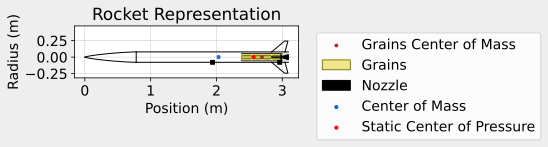


Mass Plots
----------------------------------------


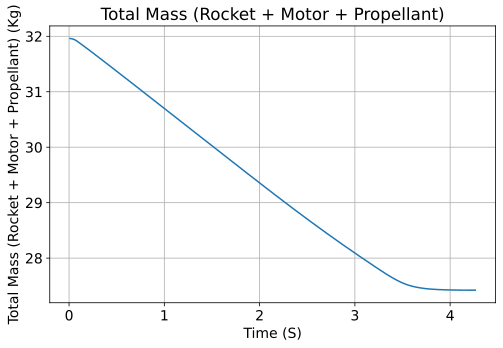

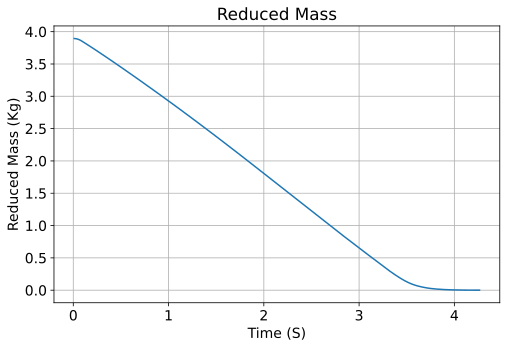


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


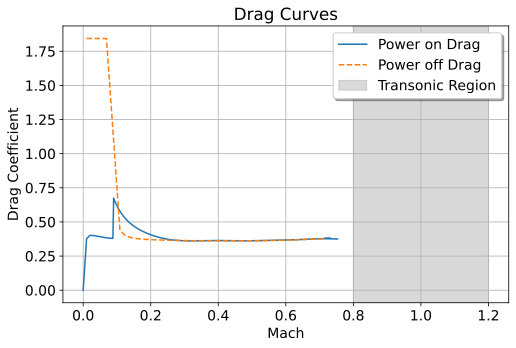


Stability Plots
--------------------


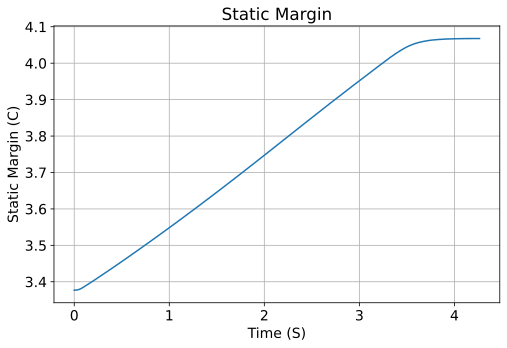

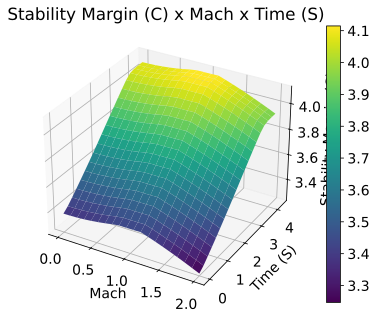


Thrust-to-Weight Plot
----------------------------------------


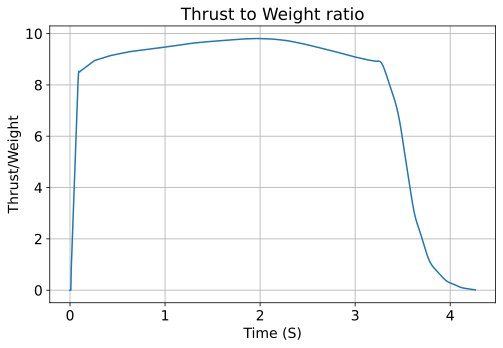

In [ ]:
Excalibur.all_info()

In [ ]:
from multiprocessing import Process, Queue, cpu_count
from time import time, process_time
import datetime
import pandas as pd
import queue

def worker_process(queue_in, queue_out, env_params):
    """Worker process that runs simulations"""
    # Recreate environment in each process
    env = Environment(
        date=env_params['date'],
        latitude=env_params['latitude'],
        longitude=env_params['longitude'],
    )
    env.set_atmospheric_model(type="Forecast", file="RAP")
    env._max_expected_height = env_params['max_height']

    while True:
        try:
            # Get next setting from queue
            setting = queue_in.get(timeout=1)
            start_time = process_time()

            try:
                # Create motor
                M1939W = SolidMotor(
                    thrust_source="/content/IREC25/AeroTech_M1939W (1).eng",
                    burn_time=4.2,
                    nozzle_radius=setting["nozzle_radius"],
                    throat_radius=setting["throat_radius"],
                    grain_number=4,
                    grain_separation=setting["grain_separation"],
                    grain_density=setting["grain_density"],
                    grain_outer_radius=setting["grain_outer_radius"],
                    grain_initial_inner_radius=setting["grain_initial_inner_radius"],
                    grain_initial_height=setting["grain_initial_height"],
                    interpolation_method="linear",
                    coordinate_system_orientation="nozzle_to_combustion_chamber",
                    nozzle_position=setting["nozzle_position"],
                    grains_center_of_mass_position=setting["grains_center_of_mass_position"],
                    dry_mass=setting["motor_dry_mass"],
                    dry_inertia=(
                        setting["motor_inertia_11"],
                        setting["motor_inertia_11"],
                        setting["motor_inertia_33"],
                    ),
                    center_of_dry_mass_position=setting["motor_dry_mass_position"],
                )

                # Create rocket
                Excalibur = Rocket(
                    radius=setting["radius"],
                    mass=setting["rocket_mass"],
                    inertia=(
                        setting["rocket_inertia_11"],
                        setting["rocket_inertia_11"],
                        setting["rocket_inertia_33"],
                    ),
                    power_off_drag = pd.read_csv("/content/IREC25/power off drag vs mach number.csv", header = None).values,
                    power_on_drag = pd.read_csv("/content/IREC25/power on drag vs mach number.csv", header = None).values,
                    center_of_mass_without_motor=0,
                    coordinate_system_orientation="nose_to_tail",
                )

                rail_buttons = Excalibur.set_rail_buttons(
                    upper_button_position=1.8415,
                    lower_button_position=2.9972,
                    angular_position=135,
                )

                Excalibur.add_motor(M1939W, position=3.0988)
                Excalibur.power_off_drag *= setting["power_off_drag"]
                Excalibur.power_on_drag *= setting["power_on_drag"]

                NoseCone = Excalibur.add_nose(
                    length=setting["nose_length"],
                    kind="vonKarman",
                    position=0,
                )

                FinSet = Excalibur.add_trapezoidal_fins(
                    n=4,
                    span=setting["fin_span"],
                    root_chord=setting["fin_root_chord"],
                    tip_chord=setting["fin_tip_chord"],
                    position=setting["fin_distance_to_CM"],
                    cant_angle=0,
                    airfoil=("/content/IREC25/CL.csv", "degrees"),
                )

                Drogue = Excalibur.add_parachute(
                    "Drogue",
                    cd_s=setting["cd_s_drogue"],
                    trigger="apogee",
                    sampling_rate=105,
                    lag=setting["lag_rec"] + setting["lag_se"],
                    noise=(0, 8.3, 0.5),
                )

                main = Excalibur.add_parachute(
                    name="main",
                    cd_s=setting["cd_s_main"],
                    trigger=335.28,
                    sampling_rate=105,
                    lag=setting["lag_rec"] + setting["lag_se"],
                    noise=(0, 8.3, 0.5),
                )

                # Run simulation
                test_flight = Flight(
                    rocket=Excalibur,
                    environment=env,
                    rail_length=setting["rail_length"],
                    inclination=setting["inclination"],
                    heading=setting["heading"],
                    max_time=300,
                )

                # Extract relevant data from test_flight to avoid pickling issues
                flight_data = {
                    'apogee': test_flight.apogee,
                    'time_to_apogee': test_flight.time_to_apogee,
                    'impact_time': test_flight.t_final,
                    'impact_velocity': test_flight.v_final,
                    # Add other relevant flight data here
                }

                queue_out.put({
                    'status': 'success',
                    'setting': setting,
                    'flight_data': flight_data,
                    'computation_time': process_time() - start_time
                })

            except Exception as E:
                queue_out.put({
                    'status': 'error',
                    'setting': setting,
                    'error': str(E),
                    'computation_time': process_time() - start_time
                })

        except queue.Empty:
            # No more settings to process
            break

def main():
    filename = "monte_carlo_analysis_outputs/Excalibur_rocket_v0"
    number_of_simulations = 100

    # Create queues for input and output
    queue_in = Queue()
    queue_out = Queue()

    # Generate all settings and put them in input queue
    all_settings = list(flight_settings(analysis_parameters, number_of_simulations))
    for setting in all_settings:
        queue_in.put(setting)

    # Prepare environment parameters
    now_plus_twelve = datetime.datetime.now() + datetime.timedelta(hours=12)
    env_params = {
        'date': now_plus_twelve,
        'latitude': 32.988528,
        'longitude': -106.975056,
        'max_height': 4500
    }

    # Create and start worker processes
    num_processes = cpu_count()
    processes = []
    for _ in range(num_processes):
        p = Process(target=worker_process, args=(queue_in, queue_out, env_params))
        p.start()
        processes.append(p)

    # Initialize timing and counters
    initial_wall_time = time()
    initial_cpu_time = process_time()
    completed = 0
    successful = 0

    # Process results as they come in
    with open("/content/IREC25/IREC25/disp_errors.txt", "w") as error_file, \
         open("/content/IREC25/IREC25/disp_inputs.txt", "w") as input_file, \
         open("/content/IREC25/IREC25/disp_outputs.txt", "w") as output_file:

        while completed < number_of_simulations:
            result = queue_out.get()
            completed += 1

            if result['status'] == 'success':
                successful += 1
                # Write flight data to files
                export_flight_data(
                    result['setting'],
                    result['flight_data'],
                    result['computation_time']
                )

                # Print progress
                print(f"\rCompleted: {completed}/{number_of_simulations} (Successful: {successful})", end="")
            else:
                error_file.write(f"Error in simulation: {result['error']}\n")
                export_flight_error(result['setting'])

        # Wait for all processes to finish
        for p in processes:
            p.join()

        # Print final statistics
        final_wall_time = time() - initial_wall_time
        final_cpu_time = process_time() - initial_cpu_time

        final_string = (
            f"\nCompleted {successful} out of {number_of_simulations} "
            f"iterations successfully.\n"
            f"Total CPU time: {final_cpu_time:.2f} s\n"
            f"Total wall time: {final_wall_time:.2f} s\n"
            f"Average time per simulation: {final_wall_time/number_of_simulations:.2f} s\n"
            f"Effective speedup: {final_cpu_time/final_wall_time:.2f}x"
        )

        print(final_string)
        for file in [input_file, output_file, error_file]:
            file.write(final_string + "\n")

if __name__ == '__main__':
    main()

In [ ]:
import multiprocessing
print(multiprocessing.cpu_count())

96


In [ ]:
filename = "monte_carlo_analysis_outputs/Excalibur_rocket_v0"

# Initialize variable to store all results
dispersion_general_results = []

dispersion_results = {
    "out_of_rail_time": [],
    "out_of_rail_velocity": [],
    "apogee_time": [],
    "apogee_altitude": [],
    "apogee_x": [],
    "apogee_y": [],
    "impact_time": [],
    "impact_x": [],
    "impact_y": [],
    "impact_velocity": [],
    "initial_static_margin": [],
    "out_of_rail_static_margin": [],
    "final_static_margin": [],
    "number_of_events": [],
    "max_velocity": [],
    "drogue_triggerTime": [],
    "drogue_inflated_time": [],
    "drogue_inflated_velocity": [],
    "main_triggerTime": [],
    "main_inflated_time": [],
    "main_inflated_velocity": [],
    "execution_time": [],
}

# Get all dispersion results
# Get file
dispersion_output_file = open("/content/IREC25/IREC25/disp_outputs.txt.txt", "r+")

# Read each line of the file and convert to dict
for line in dispersion_output_file:
    # Skip comments lines
    if line[0] != "{":
        continue
    # Eval results and store them
    flight_result = eval(line)
    dispersion_general_results.append(flight_result)
    for parameter_key, parameter_value in flight_result.items():
        dispersion_results[parameter_key].append(parameter_value)

# Close data file
dispersion_output_file.close()

# Print number of flights simulated
N = len(dispersion_general_results)
print("Number of simulations: ", N)

Number of simulations:  87


Off the Rail Time Dispersion Analysis

Out of Rail Time -         Mean Value: 0.376 s
Out of Rail Time - Standard Deviation: 0.003 s


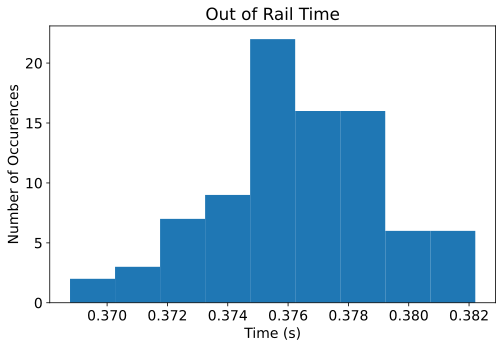

In [ ]:
print(
    f'Out of Rail Time -         Mean Value: {np.mean(dispersion_results["out_of_rail_time"]):0.3f} s'
)
print(
    f'Out of Rail Time - Standard Deviation: {np.std(dispersion_results["out_of_rail_time"]):0.3f} s'
)

plt.figure()
plt.hist(dispersion_results["out_of_rail_time"], bins=int(N**0.5))
plt.title("Out of Rail Time")
plt.xlabel("Time (s)")
plt.ylabel("Number of Occurences")
plt.show()

Off the Rail Velocity Dispersion Analysis

Out of Rail Velocity -         Mean Value: 24.925 m/s
Out of Rail Velocity - Standard Deviation: 0.201 m/s


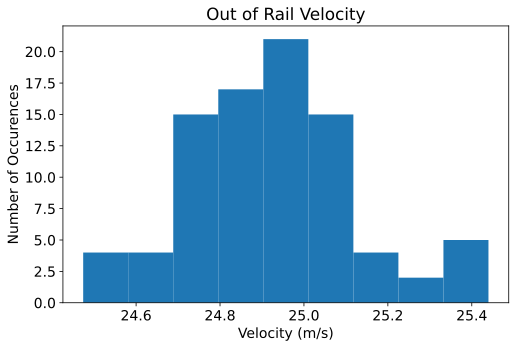

In [ ]:
print(
    f'Out of Rail Velocity -         Mean Value: {np.mean(dispersion_results["out_of_rail_velocity"]):0.3f} m/s'
)
print(
    f'Out of Rail Velocity - Standard Deviation: {np.std(dispersion_results["out_of_rail_velocity"]):0.3f} m/s'
)

plt.figure()
plt.hist(dispersion_results["out_of_rail_velocity"], bins=int(N**0.5))
plt.title("Out of Rail Velocity")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Number of Occurences")
plt.show()

Time to Apogee Dispersion Analysis

Apogee Time -         Mean Value: 25.542 s
Apogee Time - Standard Deviation: 0.284 s


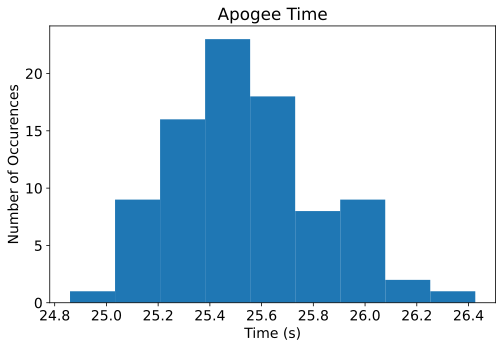

In [ ]:
print(
    f'Apogee Time -         Mean Value: {np.mean(dispersion_results["apogee_time"]):0.3f} s'
)
print(
    f'Apogee Time - Standard Deviation: {np.std(dispersion_results["apogee_time"]):0.3f} s'
)

plt.figure()
plt.hist(dispersion_results["apogee_time"], bins=int(N**0.5))
plt.title("Apogee Time")
plt.xlabel("Time (s)")
plt.ylabel("Number of Occurences")
plt.show()

Apogee Dispersion Analysis


Apogee Altitude -         Mean Value: 3114.703 m
Apogee Altitude - Standard Deviation: 72.831 m


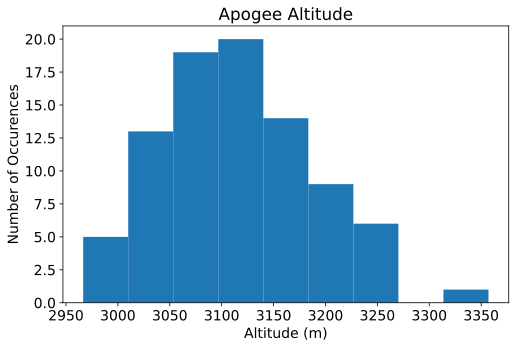

In [ ]:
print(
    f'Apogee Altitude -         Mean Value: {np.mean(dispersion_results["apogee_altitude"]):0.3f} m'
)
print(
    f'Apogee Altitude - Standard Deviation: {np.std(dispersion_results["apogee_altitude"]):0.3f} m'
)

plt.figure()
plt.hist(dispersion_results["apogee_altitude"], bins=int(N**0.5))
plt.title("Apogee Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Number of Occurences")
plt.show()


Apogee X Position Dispersion Analysis


Apogee X Position -         Mean Value: 194.333 m
Apogee X Position - Standard Deviation: 26.056 m


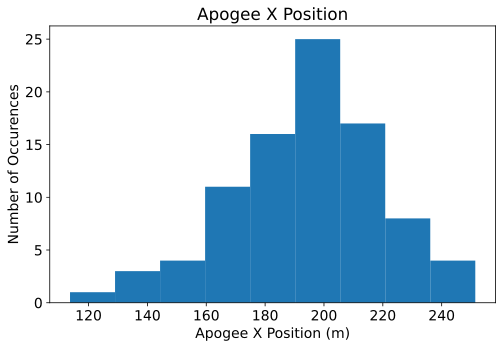

In [ ]:
print(
    f'Apogee X Position -         Mean Value: {np.mean(dispersion_results["apogee_x"]):0.3f} m'
)
print(
    f'Apogee X Position - Standard Deviation: {np.std(dispersion_results["apogee_x"]):0.3f} m'
)

plt.figure()
plt.hist(dispersion_results["apogee_x"], bins=int(N**0.5))
plt.title("Apogee X Position")
plt.xlabel("Apogee X Position (m)")
plt.ylabel("Number of Occurences")
plt.show()

Apogee Y Position Dispersion Analysis

Apogee Y Position -         Mean Value: 1048.765 m
Apogee Y Position - Standard Deviation: 116.165 m


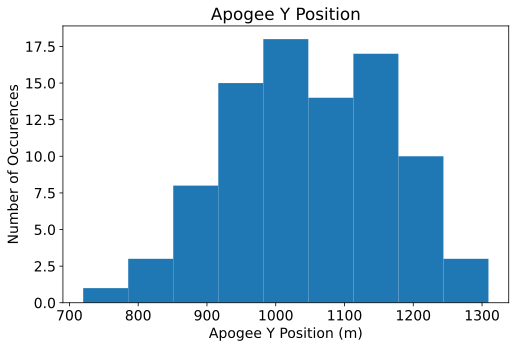

In [ ]:
print(
    f'Apogee Y Position -         Mean Value: {np.mean(dispersion_results["apogee_y"]):0.3f} m'
)
print(
    f'Apogee Y Position - Standard Deviation: {np.std(dispersion_results["apogee_y"]):0.3f} m'
)

plt.figure()
plt.hist(dispersion_results["apogee_y"], bins=int(N**0.5))
plt.title("Apogee Y Position")
plt.xlabel("Apogee Y Position (m)")
plt.ylabel("Number of Occurences")
plt.show()

Impact Time Dispersion Analysis

Impact Time -         Mean Value: 164.726 s
Impact Time - Standard Deviation: 60.798 s


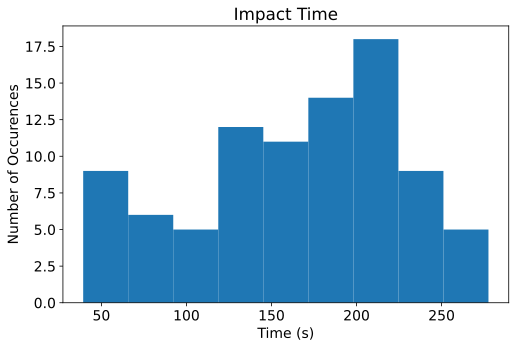

In [ ]:
print(
    f'Impact Time -         Mean Value: {np.mean(dispersion_results["impact_time"]):0.3f} s'
)
print(
    f'Impact Time - Standard Deviation: {np.std(dispersion_results["impact_time"]):0.3f} s'
)

plt.figure()
plt.hist(dispersion_results["impact_time"], bins=int(N**0.5))
plt.title("Impact Time")
plt.xlabel("Time (s)")
plt.ylabel("Number of Occurences")
plt.show()

Impact X Position Dispersion Analysis

Impact X Position -         Mean Value: 579.536 m
Impact X Position - Standard Deviation: 158.930 m


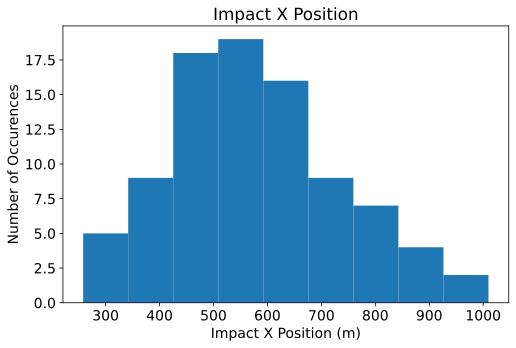

In [ ]:
print(
    f'Impact X Position -         Mean Value: {np.mean(dispersion_results["impact_x"]):0.3f} m'
)
print(
    f'Impact X Position - Standard Deviation: {np.std(dispersion_results["impact_x"]):0.3f} m'
)

plt.figure()
plt.hist(dispersion_results["impact_x"], bins=int(N**0.5))
plt.title("Impact X Position")
plt.xlabel("Impact X Position (m)")
plt.ylabel("Number of Occurences")
plt.show()

Impact Y Position Dispersion Analysis

Impact X Position -         Mean Value: 579.536 m
Impact X Position - Standard Deviation: 158.930 m


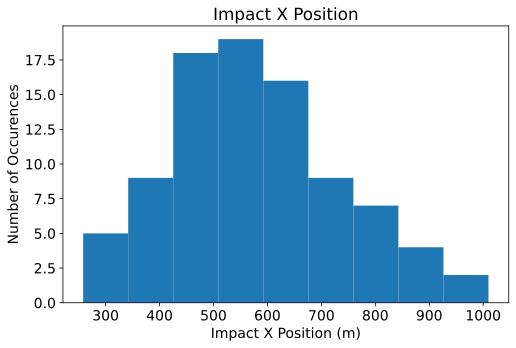

In [ ]:
print(
    f'Impact X Position -         Mean Value: {np.mean(dispersion_results["impact_x"]):0.3f} m'
)
print(
    f'Impact X Position - Standard Deviation: {np.std(dispersion_results["impact_x"]):0.3f} m'
)

plt.figure()
plt.hist(dispersion_results["impact_x"], bins=int(N**0.5))
plt.title("Impact X Position")
plt.xlabel("Impact X Position (m)")
plt.ylabel("Number of Occurences")
plt.show()

Impact Velocity Dispersion Analysis

Impact Velocity -         Mean Value: -7.969 m/s
Impact Velocity - Standard Deviation: 0.530 m/s


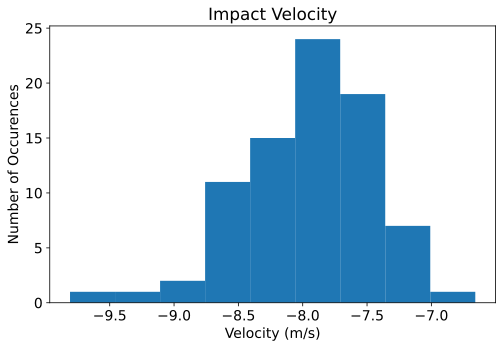

[-7.8698329  -8.05741347 -8.15710456 -8.00654058 -8.04744919 -8.27573113
 -8.50063156 -9.06288785 -8.28696897 -8.21122066 -8.37686519 -8.81103354
 -7.53806388 -9.80856799 -7.88466506 -8.19861985 -9.39947106 -7.84271407
 -7.43589686 -8.12773215 -8.57706216 -8.41935264 -7.77490362 -7.2029923
 -8.65070872 -8.21307157 -7.80179261 -7.07253363 -8.0269404  -7.30725028
 -7.57495466 -7.5565945  -8.39582331 -7.89790649 -7.31960886 -6.65861285
 -8.3277404  -7.06008125 -7.7655572  -7.4288017  -7.67481762 -8.04396914
 -7.37118824 -8.73445829 -8.66509791 -8.18553547 -7.62275215 -7.42721887
 -7.64509364 -7.59194637 -8.71327091 -7.32848976 -7.45494621 -7.49706994
 -8.47921835 -8.04580138 -7.8484538  -8.29468971 -7.85327219 -7.87119013
 -8.04126531 -7.91067795 -7.62472294 -8.0471668  -8.42371764 -8.71049797
 -7.67964001 -7.14211653 -7.72753379 -7.49703307 -7.71864518 -7.47472794
 -8.46996376 -8.01794522 -7.63056605 -8.04718233 -8.23331311 -7.93420556
 -8.10691864 -8.33359953 -7.47685786]


In [ ]:
print(
    f'Impact Velocity -         Mean Value: {np.mean(np.array(dispersion_results["impact_velocity"])[np.array(dispersion_results["impact_velocity"]) > -20]):0.3f} m/s'
)
print(
    f'Impact Velocity - Standard Deviation: {np.std(np.array(dispersion_results["impact_velocity"])[np.array(dispersion_results["impact_velocity"]) > -20]):0.3f} m/s'
)

plt.figure()
plt.hist(np.array(dispersion_results["impact_velocity"])[np.array(dispersion_results["impact_velocity"]) > -20], bins=int(N**0.5))
plt.title("Impact Velocity")
# plt.grid()
#plt.xlim(-35, 0)
plt.xlabel("Velocity (m/s)")
plt.ylabel("Number of Occurences")
plt.show()
print(np.array(dispersion_results["impact_velocity"])[np.array(dispersion_results["impact_velocity"]) >  -20])

Initial Static Margin -             Mean Value: 2.603 c
Initial Static Margin -     Standard Deviation: 0.183 c
Out of Rail Static Margin -         Mean Value: 2.662 c
Out of Rail Static Margin - Standard Deviation: 0.184 c
Final Static Margin -               Mean Value: 3.313 c
Final Static Margin -       Standard Deviation: 0.186 c


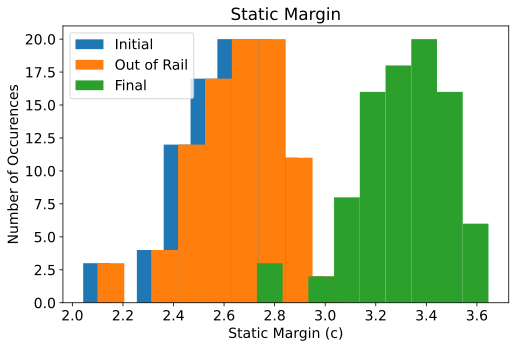

In [ ]:
print(
    f'Initial Static Margin -             Mean Value: {np.mean(dispersion_results["initial_static_margin"]):0.3f} c'
)
print(
    f'Initial Static Margin -     Standard Deviation: {np.std(dispersion_results["initial_static_margin"]):0.3f} c'
)

print(
    f'Out of Rail Static Margin -         Mean Value: {np.mean(dispersion_results["out_of_rail_static_margin"]):0.3f} c'
)
print(
    f'Out of Rail Static Margin - Standard Deviation: {np.std(dispersion_results["out_of_rail_static_margin"]):0.3f} c'
)

print(
    f'Final Static Margin -               Mean Value: {np.mean(dispersion_results["final_static_margin"]):0.3f} c'
)
print(
    f'Final Static Margin -       Standard Deviation: {np.std(dispersion_results["final_static_margin"]):0.3f} c'
)

plt.figure()
plt.hist(dispersion_results["initial_static_margin"], label="Initial", bins=int(N**0.5))
plt.hist(
    dispersion_results["out_of_rail_static_margin"],
    label="Out of Rail",
    bins=int(N**0.5),
)
plt.hist(dispersion_results["final_static_margin"], label="Final", bins=int(N**0.5))
plt.legend()
plt.title("Static Margin")
plt.xlabel("Static Margin (c)")
plt.ylabel("Number of Occurences")
plt.show()